# Stracking workflow example
This example shows how to detect particles in 3D+t image using the LoG detector

## Load data

In [1]:
from stracking import data
from tifffile import imread

folder=""

filenamePKMR="PKMR_10timepoints_crop.tif"
filenamePMDR="PMDR_10timepoints_crop.tif"
PKMRimg= imread(folder+filenamePKMR)
PMDRimg= imread(folder+filenamePMDR)

## Create an empty napari viewer


In [2]:
%gui qt

In [3]:
import napari
from napari.utils import nbscreenshot
viewer = napari.Viewer(axis_labels='tzyx')

## Display volumetric timeseries

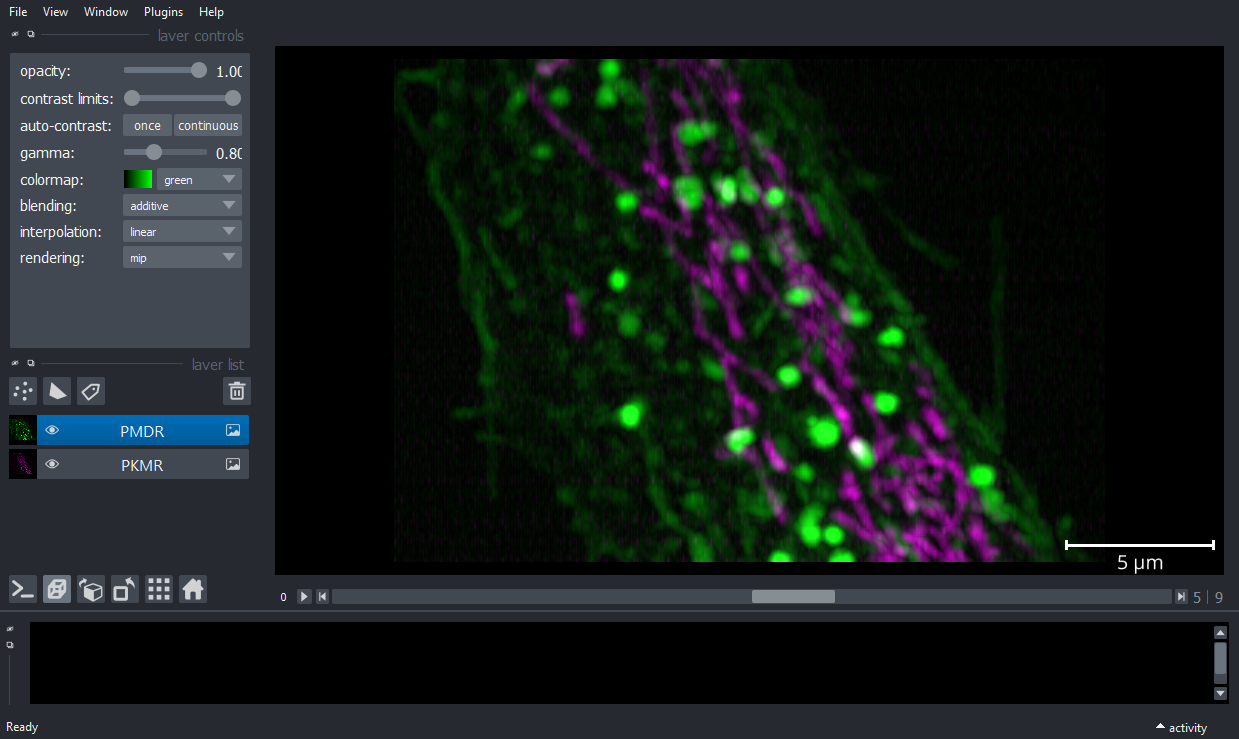

In [4]:
viewer.add_image(PKMRimg, name='PKMR', multiscale=False, scale=[4.3,0.316,0.104,0.104],
            contrast_limits=[10, 600], colormap='magenta',blending='additive');

viewer.add_image(PMDRimg, name='PMDR', multiscale=False, scale=[4.3,0.316,0.104,0.104],
            contrast_limits=[10, 1_000], colormap='green',blending='additive',gamma=0.8);

viewer.dims.ndisplay = 3
viewer.scale_bar.visible='true'
viewer.scale_bar.unit='um'
nbscreenshot(viewer)

## LoG 3D+t detection

In [5]:
from stracking.detectors import LoGDetector

detector = LoGDetector(min_sigma=3, max_sigma=5, num_sigma=3, threshold=0.001)
particles = detector.run(PMDRimg)


### Display spots

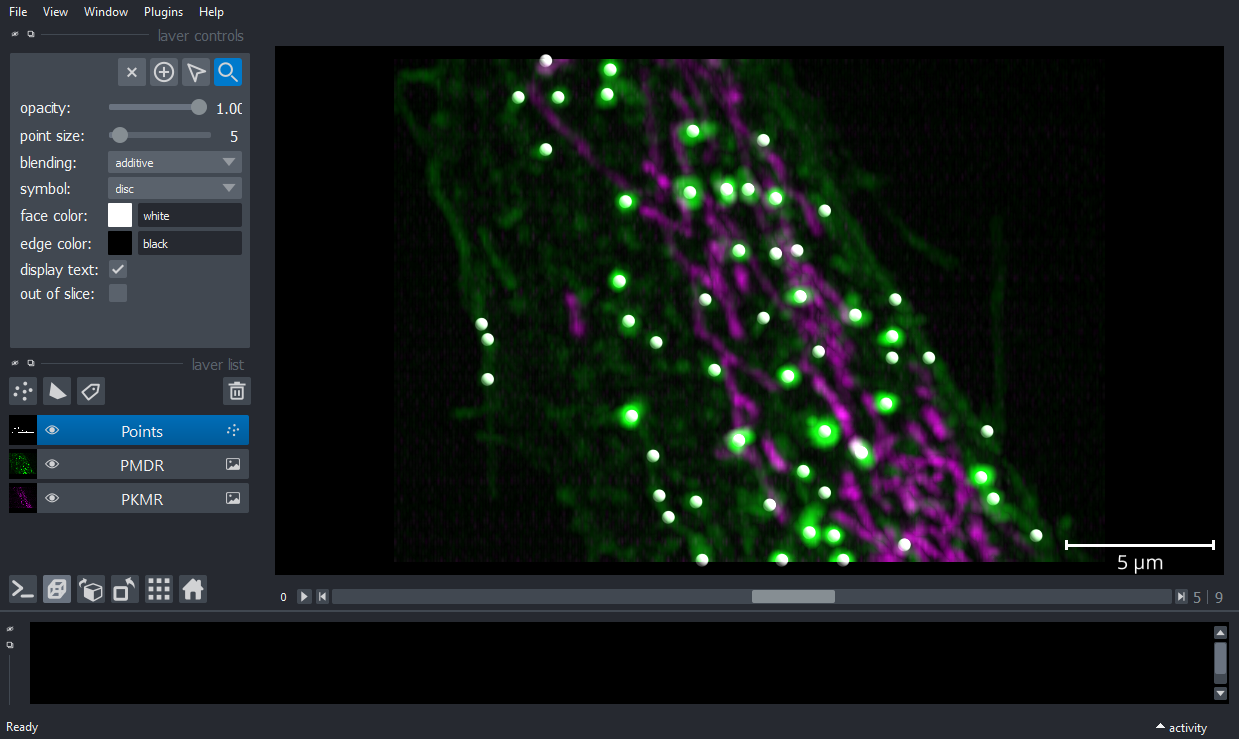

In [6]:
viewer.add_points(particles.data, size=5, shading='spherical',scale=[4.3,0.316,0.104,0.104],blending='additive')
nbscreenshot(viewer)

## Spots properties

In [7]:
from stracking.properties import IntensityProperty

property_calc = IntensityProperty(radius=2.5)
property_calc.run(particles,PKMRimg)
y=particles.properties['mean_intensity']
particlesch1=particles
property_calc = IntensityProperty(radius=2.5)
property_calc.run(particles,PMDRimg)
x=particles.properties['mean_intensity']

### Spots statistics

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

plt.style.use('_mpl-gallery')
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharey=False)
axs[0].set_title("Mean Intensity [a.u.]",fontsize=14)
axs[0].set_ylabel("Mitochondria Intensity",fontsize=14)
axs[0].set_xlabel("Endosomes Intensity",fontsize=14)
axs[0].scatter(x,y,alpha=0.5,color='r');
axs[0].tick_params(axis='both', labelsize=14)
sns.set_style("whitegrid")
axs[1] = sns.swarmplot(y=x,alpha=0.9,size=3)
axs[1].set_ylabel("Endosomes Intensity",fontsize=14)
axs[1].set_xlabel("PMDR",fontsize=14)
axs[1].set_title("Endosomes Intensity [a.u.]",fontsize=14)
axs[1].tick_params(axis='both',labelsize=14)

## Tracker
Shortest path tracking with euclidean cost

In [9]:
from stracking.linkers import SPLinker, EuclideanCost

euclidean_cost = EuclideanCost(max_cost=225)
my_tracker = SPLinker(cost=euclidean_cost, gap=1)
tracks = my_tracker.run(particles)


detections shape= (564, 4)
num frames= 10
cost= 1.0
self.cost.max_cost= 225
cost= 2819.0
self.cost.max_cost= 225
cost= 1398.0
self.cost.max_cost= 225
cost= 2505.0
self.cost.max_cost= 225
cost= 784.0
self.cost.max_cost= 225
cost= 1403.0
self.cost.max_cost= 225
cost= 3380.0
self.cost.max_cost= 225
cost= 1014.0
self.cost.max_cost= 225
cost= 985.0
self.cost.max_cost= 225
cost= 8450.0
self.cost.max_cost= 225
cost= 6638.0
self.cost.max_cost= 225
cost= 117.0
self.cost.max_cost= 225
cost= 1923.0
self.cost.max_cost= 225
cost= 14696.0
self.cost.max_cost= 225
cost= 3078.0
self.cost.max_cost= 225
cost= 5129.0
self.cost.max_cost= 225
cost= 25585.0
self.cost.max_cost= 225
cost= 17958.0
self.cost.max_cost= 225
cost= 1547.0
self.cost.max_cost= 225
cost= 11397.0
self.cost.max_cost= 225
cost= 21154.0
self.cost.max_cost= 225
cost= 5114.0
self.cost.max_cost= 225
cost= 18709.0
self.cost.max_cost= 225
cost= 213.0
self.cost.max_cost= 225
cost= 7371.0
self.cost.max_cost= 225
cost= 4123.0
self.cost.max_cost= 2

cost= 23093.0
self.cost.max_cost= 225
cost= 30749.0
self.cost.max_cost= 225
cost= 129.0
self.cost.max_cost= 225
cost= 980.0
self.cost.max_cost= 225
cost= 793.0
self.cost.max_cost= 225
cost= 22750.0
self.cost.max_cost= 225
cost= 17593.0
self.cost.max_cost= 225
cost= 20158.0
self.cost.max_cost= 225
cost= 6100.0
self.cost.max_cost= 225
cost= 6754.0
self.cost.max_cost= 225
cost= 30262.0
self.cost.max_cost= 225
cost= 18174.0
self.cost.max_cost= 225
cost= 10611.0
self.cost.max_cost= 225
cost= 6449.0
self.cost.max_cost= 225
cost= 9245.0
self.cost.max_cost= 225
cost= 1690.0
self.cost.max_cost= 225
cost= 1553.0
self.cost.max_cost= 225
cost= 7748.0
self.cost.max_cost= 225
cost= 13778.0
self.cost.max_cost= 225
cost= 9513.0
self.cost.max_cost= 225
cost= 5899.0
self.cost.max_cost= 225
cost= 8665.0
self.cost.max_cost= 225
cost= 27459.0
self.cost.max_cost= 225
cost= 8646.0
self.cost.max_cost= 225
cost= 313.0
self.cost.max_cost= 225
cost= 23513.0
self.cost.max_cost= 225
cost= 5301.0
self.cost.max_cost

self.cost.max_cost= 225
cost= 850.0
self.cost.max_cost= 225
cost= 4651.0
self.cost.max_cost= 225
cost= 12453.0
self.cost.max_cost= 225
cost= 1187.0
self.cost.max_cost= 225
cost= 398.0
self.cost.max_cost= 225
cost= 27005.0
self.cost.max_cost= 225
cost= 1930.0
self.cost.max_cost= 225
cost= 626.0
self.cost.max_cost= 225
cost= 8258.0
self.cost.max_cost= 225
cost= 17012.0
self.cost.max_cost= 225
cost= 15833.0
self.cost.max_cost= 225
cost= 10130.0
self.cost.max_cost= 225
cost= 13715.0
self.cost.max_cost= 225
cost= 3116.0
self.cost.max_cost= 225
cost= 1267.0
self.cost.max_cost= 225
cost= 6993.0
self.cost.max_cost= 225
cost= 6602.0
self.cost.max_cost= 225
cost= 1.0
self.cost.max_cost= 225
cost= 321.0
self.cost.max_cost= 225
cost= 9738.0
self.cost.max_cost= 225
cost= 14608.0
self.cost.max_cost= 225
cost= 995.0
self.cost.max_cost= 225
cost= 18861.0
self.cost.max_cost= 225
cost= 482.0
self.cost.max_cost= 225
cost= 6114.0
self.cost.max_cost= 225
cost= 2141.0
self.cost.max_cost= 225
cost= 16960.0
s

self.cost.max_cost= 225
cost= 232.0
self.cost.max_cost= 225
cost= 47586.0
self.cost.max_cost= 225
cost= 28502.0
self.cost.max_cost= 225
cost= 12577.0
self.cost.max_cost= 225
cost= 2987.0
self.cost.max_cost= 225
cost= 8995.0
self.cost.max_cost= 225
cost= 848.0
self.cost.max_cost= 225
cost= 8861.0
self.cost.max_cost= 225
cost= 4970.0
self.cost.max_cost= 225
cost= 31162.0
self.cost.max_cost= 225
cost= 16331.0
self.cost.max_cost= 225
cost= 93.0
self.cost.max_cost= 225
cost= 18355.0
self.cost.max_cost= 225
cost= 32077.0
self.cost.max_cost= 225
cost= 6402.0
self.cost.max_cost= 225
cost= 6545.0
self.cost.max_cost= 225
cost= 27115.0
self.cost.max_cost= 225
cost= 7169.0
self.cost.max_cost= 225
cost= 1642.0
self.cost.max_cost= 225
cost= 44291.0
self.cost.max_cost= 225
cost= 5300.0
self.cost.max_cost= 225
cost= 4814.0
self.cost.max_cost= 225
cost= 146.0
self.cost.max_cost= 225
cost= 1728.0
self.cost.max_cost= 225
cost= 1121.0
self.cost.max_cost= 225
cost= 3474.0
self.cost.max_cost= 225
cost= 651.

self.cost.max_cost= 225
cost= 17757.0
self.cost.max_cost= 225
cost= 12689.0
self.cost.max_cost= 225
cost= 3429.0
self.cost.max_cost= 225
cost= 116.0
self.cost.max_cost= 225
cost= 4854.0
self.cost.max_cost= 225
cost= 810.0
self.cost.max_cost= 225
cost= 12701.0
self.cost.max_cost= 225
cost= 6146.0
self.cost.max_cost= 225
cost= 3091.0
self.cost.max_cost= 225
cost= 12013.0
self.cost.max_cost= 225
cost= 958.0
self.cost.max_cost= 225
cost= 15060.0
self.cost.max_cost= 225
cost= 2870.0
self.cost.max_cost= 225
cost= 3712.0
self.cost.max_cost= 225
cost= 2185.0
self.cost.max_cost= 225
cost= 9138.0
self.cost.max_cost= 225
cost= 2266.0
self.cost.max_cost= 225
cost= 1422.0
self.cost.max_cost= 225
cost= 7107.0
self.cost.max_cost= 225
cost= 11826.0
self.cost.max_cost= 225
cost= 4997.0
self.cost.max_cost= 225
cost= 3069.0
self.cost.max_cost= 225
cost= 4018.0
self.cost.max_cost= 225
cost= 13508.0
self.cost.max_cost= 225
cost= 7389.0
self.cost.max_cost= 225
cost= 1894.0
self.cost.max_cost= 225
cost= 6227

cost= 18650.0
self.cost.max_cost= 225
cost= 20971.0
self.cost.max_cost= 225
cost= 854.0
self.cost.max_cost= 225
cost= 7461.0
self.cost.max_cost= 225
cost= 5736.0
self.cost.max_cost= 225
cost= 24410.0
self.cost.max_cost= 225
cost= 35972.0
self.cost.max_cost= 225
cost= 4590.0
self.cost.max_cost= 225
cost= 746.0
self.cost.max_cost= 225
cost= 4269.0
self.cost.max_cost= 225
cost= 16011.0
self.cost.max_cost= 225
cost= 7243.0
self.cost.max_cost= 225
cost= 27364.0
self.cost.max_cost= 225
cost= 13233.0
self.cost.max_cost= 225
cost= 12546.0
self.cost.max_cost= 225
cost= 10354.0
self.cost.max_cost= 225
cost= 2939.0
self.cost.max_cost= 225
cost= 32121.0
self.cost.max_cost= 225
cost= 4235.0
self.cost.max_cost= 225
cost= 825.0
self.cost.max_cost= 225
cost= 10594.0
self.cost.max_cost= 225
cost= 18601.0
self.cost.max_cost= 225
cost= 1003.0
self.cost.max_cost= 225
cost= 8441.0
self.cost.max_cost= 225
cost= 19882.0
self.cost.max_cost= 225
cost= 4715.0
self.cost.max_cost= 225
cost= 13736.0
self.cost.max_

self.cost.max_cost= 225
cost= 23834.0
self.cost.max_cost= 225
cost= 398.0
self.cost.max_cost= 225
cost= 1963.0
self.cost.max_cost= 225
cost= 2210.0
self.cost.max_cost= 225
cost= 17401.0
self.cost.max_cost= 225
cost= 15758.0
self.cost.max_cost= 225
cost= 17453.0
self.cost.max_cost= 225
cost= 3595.0
self.cost.max_cost= 225
cost= 5893.0
self.cost.max_cost= 225
cost= 25613.0
self.cost.max_cost= 225
cost= 13241.0
self.cost.max_cost= 225
cost= 5556.0
self.cost.max_cost= 225
cost= 2846.0
self.cost.max_cost= 225
cost= 4346.0
self.cost.max_cost= 225
cost= 1701.0
self.cost.max_cost= 225
cost= 1094.0
self.cost.max_cost= 225
cost= 3483.0
self.cost.max_cost= 225
cost= 13153.0
self.cost.max_cost= 225
cost= 5654.0
self.cost.max_cost= 225
cost= 4652.0
self.cost.max_cost= 225
cost= 5918.0
self.cost.max_cost= 225
cost= 19416.0
self.cost.max_cost= 225
cost= 3989.0
self.cost.max_cost= 225
cost= 782.0
self.cost.max_cost= 225
cost= 15970.0
self.cost.max_cost= 225
cost= 1858.0
self.cost.max_cost= 225
cost= 2

self.cost.max_cost= 225
cost= 987.0
self.cost.max_cost= 225
cost= 74.0
self.cost.max_cost= 225
cost= 1.0
self.cost.max_cost= 225
cost= 19348.0
self.cost.max_cost= 225
cost= 12529.0
self.cost.max_cost= 225
cost= 15094.0
self.cost.max_cost= 225
cost= 10474.0
self.cost.max_cost= 225
cost= 11938.0
self.cost.max_cost= 225
cost= 24694.0
self.cost.max_cost= 225
cost= 15486.0
self.cost.max_cost= 225
cost= 11409.0
self.cost.max_cost= 225
cost= 9821.0
self.cost.max_cost= 225
cost= 11045.0
self.cost.max_cost= 225
cost= 4606.0
self.cost.max_cost= 225
cost= 971.0
self.cost.max_cost= 225
cost= 10694.0
self.cost.max_cost= 225
cost= 8936.0
self.cost.max_cost= 225
cost= 8493.0
self.cost.max_cost= 225
cost= 10729.0
self.cost.max_cost= 225
cost= 6649.0
self.cost.max_cost= 225
cost= 26589.0
self.cost.max_cost= 225
cost= 11304.0
self.cost.max_cost= 225
cost= 349.0
self.cost.max_cost= 225
cost= 23153.0
self.cost.max_cost= 225
cost= 6489.0
self.cost.max_cost= 225
cost= 9818.0
self.cost.max_cost= 225
cost= 21

self.cost.max_cost= 225
cost= 601.0
self.cost.max_cost= 225
cost= 20765.0
self.cost.max_cost= 225
cost= 17574.0
self.cost.max_cost= 225
cost= 19835.0
self.cost.max_cost= 225
cost= 14.0
self.cost.max_cost= 225
cost= 4113.0
self.cost.max_cost= 225
cost= 2688.0
self.cost.max_cost= 225
cost= 28646.0
self.cost.max_cost= 225
cost= 40268.0
self.cost.max_cost= 225
cost= 1818.0
self.cost.max_cost= 225
cost= 318.0
self.cost.max_cost= 225
cost= 6601.0
self.cost.max_cost= 225
cost= 19843.0
self.cost.max_cost= 225
cost= 10291.0
self.cost.max_cost= 225
cost= 29604.0
self.cost.max_cost= 225
cost= 12905.0
self.cost.max_cost= 225
cost= 16278.0
self.cost.max_cost= 225
cost= 6762.0
self.cost.max_cost= 225
cost= 3443.0
self.cost.max_cost= 225
cost= 36269.0
self.cost.max_cost= 225
cost= 3579.0
self.cost.max_cost= 225
cost= 2885.0
self.cost.max_cost= 225
cost= 14234.0
self.cost.max_cost= 225
cost= 18437.0
self.cost.max_cost= 225
cost= 3291.0
self.cost.max_cost= 225
cost= 10509.0
self.cost.max_cost= 225
cost

self.cost.max_cost= 225
cost= 13466.0
self.cost.max_cost= 225
cost= 14166.0
self.cost.max_cost= 225
cost= 20674.0
self.cost.max_cost= 225
cost= 566.0
self.cost.max_cost= 225
cost= 1377.0
self.cost.max_cost= 225
cost= 1748.0
self.cost.max_cost= 225
cost= 14513.0
self.cost.max_cost= 225
cost= 12666.0
self.cost.max_cost= 225
cost= 14211.0
self.cost.max_cost= 225
cost= 5057.0
self.cost.max_cost= 225
cost= 8075.0
self.cost.max_cost= 225
cost= 21801.0
self.cost.max_cost= 225
cost= 10785.0
self.cost.max_cost= 225
cost= 4786.0
self.cost.max_cost= 225
cost= 3640.0
self.cost.max_cost= 225
cost= 4192.0
self.cost.max_cost= 225
cost= 2811.0
self.cost.max_cost= 225
cost= 434.0
self.cost.max_cost= 225
cost= 3921.0
self.cost.max_cost= 225
cost= 10377.0
self.cost.max_cost= 225
cost= 4184.0
self.cost.max_cost= 225
cost= 6638.0
self.cost.max_cost= 225
cost= 4152.0
self.cost.max_cost= 225
cost= 17330.0
self.cost.max_cost= 225
cost= 4241.0
self.cost.max_cost= 225
cost= 566.0
self.cost.max_cost= 225
cost= 1

cost= 9038.0
self.cost.max_cost= 225
cost= 6024.0
self.cost.max_cost= 225
cost= 10741.0
self.cost.max_cost= 225
cost= 1341.0
self.cost.max_cost= 225
cost= 8370.0
self.cost.max_cost= 225
cost= 4610.0
self.cost.max_cost= 225
cost= 1538.0
self.cost.max_cost= 225
cost= 3874.0
self.cost.max_cost= 225
cost= 481.0
self.cost.max_cost= 225
cost= 6587.0
self.cost.max_cost= 225
cost= 5162.0
self.cost.max_cost= 225
cost= 7382.0
self.cost.max_cost= 225
cost= 13410.0
self.cost.max_cost= 225
cost= 7238.0
self.cost.max_cost= 225
cost= 9897.0
self.cost.max_cost= 225
cost= 11140.0
self.cost.max_cost= 225
cost= 10465.0
self.cost.max_cost= 225
cost= 16242.0
self.cost.max_cost= 225
cost= 15987.0
self.cost.max_cost= 225
cost= 5257.0
self.cost.max_cost= 225
cost= 11515.0
self.cost.max_cost= 225
cost= 19665.0
self.cost.max_cost= 225
cost= 7449.0
self.cost.max_cost= 225
cost= 458.0
self.cost.max_cost= 225
cost= 1784.0
self.cost.max_cost= 225
cost= 0.0
self.cost.max_cost= 225
cost= 8507.0
self.cost.max_cost= 22

cost= 18234.0
self.cost.max_cost= 225
cost= 1202.0
self.cost.max_cost= 225
cost= 3618.0
self.cost.max_cost= 225
cost= 4235.0
self.cost.max_cost= 225
cost= 8550.0
self.cost.max_cost= 225
cost= 2486.0
self.cost.max_cost= 225
cost= 2202.0
self.cost.max_cost= 225
cost= 9809.0
self.cost.max_cost= 225
cost= 7790.0
self.cost.max_cost= 225
cost= 5125.0
self.cost.max_cost= 225
cost= 3955.0
self.cost.max_cost= 225
cost= 5339.0
self.cost.max_cost= 225
cost= 11801.0
self.cost.max_cost= 225
cost= 12026.0
self.cost.max_cost= 225
cost= 8621.0
self.cost.max_cost= 225
cost= 10106.0
self.cost.max_cost= 225
cost= 1829.0
self.cost.max_cost= 225
cost= 286.0
self.cost.max_cost= 225
cost= 3834.0
self.cost.max_cost= 225
cost= 4955.0
self.cost.max_cost= 225
cost= 574.0
self.cost.max_cost= 225
cost= 72.0
self.cost.max_cost= 225
cost= 6363.0
self.cost.max_cost= 225
cost= 11701.0
self.cost.max_cost= 225
cost= 2942.0
self.cost.max_cost= 225
cost= 13446.0
self.cost.max_cost= 225
cost= 77.0
self.cost.max_cost= 225
c

cost= 1652.0
self.cost.max_cost= 225
cost= 18636.0
self.cost.max_cost= 225
cost= 14781.0
self.cost.max_cost= 225
cost= 16834.0
self.cost.max_cost= 225
cost= 275.0
self.cost.max_cost= 225
cost= 2150.0
self.cost.max_cost= 225
cost= 1205.0
self.cost.max_cost= 225
cost= 28541.0
self.cost.max_cost= 225
cost= 39317.0
self.cost.max_cost= 225
cost= 1301.0
self.cost.max_cost= 225
cost= 449.0
self.cost.max_cost= 225
cost= 7382.0
self.cost.max_cost= 225
cost= 20154.0
self.cost.max_cost= 225
cost= 10970.0
self.cost.max_cost= 225
cost= 28001.0
self.cost.max_cost= 225
cost= 10932.0
self.cost.max_cost= 225
cost= 16945.0
self.cost.max_cost= 225
cost= 4171.0
self.cost.max_cost= 225
cost= 3290.0
self.cost.max_cost= 225
cost= 35390.0
self.cost.max_cost= 225
cost= 2646.0
self.cost.max_cost= 225
cost= 5006.0
self.cost.max_cost= 225
cost= 15027.0
self.cost.max_cost= 225
cost= 16090.0
self.cost.max_cost= 225
cost= 5266.0
self.cost.max_cost= 225
cost= 10270.0
self.cost.max_cost= 225
cost= 24017.0
self.cost.ma

self.cost.max_cost= 225
cost= 7980.0
self.cost.max_cost= 225
cost= 5109.0
self.cost.max_cost= 225
cost= 8538.0
self.cost.max_cost= 225
cost= 18310.0
self.cost.max_cost= 225
cost= 130.0
self.cost.max_cost= 225
cost= 7875.0
self.cost.max_cost= 225
cost= 4373.0
self.cost.max_cost= 225
cost= 13914.0
self.cost.max_cost= 225
cost= 11186.0
self.cost.max_cost= 225
cost= 4123.0
self.cost.max_cost= 225
cost= 2706.0
self.cost.max_cost= 225
cost= 843.0
self.cost.max_cost= 225
cost= 2326.0
self.cost.max_cost= 225
cost= 731.0
self.cost.max_cost= 225
cost= 4616.0
self.cost.max_cost= 225
cost= 3.0
self.cost.max_cost= 225
cost= 3470.0
self.cost.max_cost= 225
cost= 6386.0
self.cost.max_cost= 225
cost= 12633.0
self.cost.max_cost= 225
cost= 20066.0
self.cost.max_cost= 225
cost= 4229.0
self.cost.max_cost= 225
cost= 106.0
self.cost.max_cost= 225
cost= 13869.0
self.cost.max_cost= 225
cost= 658.0
self.cost.max_cost= 225
cost= 32794.0
self.cost.max_cost= 225
cost= 9193.0
self.cost.max_cost= 225
cost= 2778.0
se

cost= 5186.0
self.cost.max_cost= 225
cost= 13506.0
self.cost.max_cost= 225
cost= 1314.0
self.cost.max_cost= 225
cost= 5017.0
self.cost.max_cost= 225
cost= 2353.0
self.cost.max_cost= 225
cost= 11578.0
self.cost.max_cost= 225
cost= 9554.0
self.cost.max_cost= 225
cost= 1557.0
self.cost.max_cost= 225
cost= 16672.0
self.cost.max_cost= 225
cost= 8189.0
self.cost.max_cost= 225
cost= 6104.0
self.cost.max_cost= 225
cost= 14805.0
self.cost.max_cost= 225
cost= 9678.0
self.cost.max_cost= 225
cost= 13621.0
self.cost.max_cost= 225
cost= 3542.0
self.cost.max_cost= 225
cost= 1834.0
self.cost.max_cost= 225
cost= 209.0
self.cost.max_cost= 225
cost= 746.0
self.cost.max_cost= 225
cost= 5123.0
self.cost.max_cost= 225
cost= 15930.0
self.cost.max_cost= 225
cost= 1.0
self.cost.max_cost= 225
cost= 9824.0
self.cost.max_cost= 225
cost= 5970.0
self.cost.max_cost= 225
cost= 587.0
self.cost.max_cost= 225
cost= 19418.0
self.cost.max_cost= 225
cost= 2939.0
self.cost.max_cost= 225
cost= 1998.0
self.cost.max_cost= 225


cost= 13606.0
self.cost.max_cost= 225
cost= 2681.0
self.cost.max_cost= 225
cost= 7448.0
self.cost.max_cost= 225
cost= 9096.0
self.cost.max_cost= 225
cost= 16405.0
self.cost.max_cost= 225
cost= 27188.0
self.cost.max_cost= 225
cost= 4601.0
self.cost.max_cost= 225
cost= 2840.0
self.cost.max_cost= 225
cost= 18905.0
self.cost.max_cost= 225
cost= 2106.0
self.cost.max_cost= 225
cost= 44534.0
self.cost.max_cost= 225
cost= 13005.0
self.cost.max_cost= 225
cost= 4.0
self.cost.max_cost= 225
cost= 36929.0
self.cost.max_cost= 225
cost= 33320.0
self.cost.max_cost= 225
cost= 26885.0
self.cost.max_cost= 225
cost= 19546.0
self.cost.max_cost= 225
cost= 14110.0
self.cost.max_cost= 225
cost= 1581.0
self.cost.max_cost= 225
cost= 6265.0
self.cost.max_cost= 225
cost= 20194.0
self.cost.max_cost= 225
cost= 39825.0
self.cost.max_cost= 225
cost= 3933.0
self.cost.max_cost= 225
cost= 25332.0
self.cost.max_cost= 225
cost= 9331.0
self.cost.max_cost= 225
cost= 16427.0
self.cost.max_cost= 225
cost= 3993.0
self.cost.max

self.cost.max_cost= 225
cost= 4677.0
self.cost.max_cost= 225
cost= 2394.0
self.cost.max_cost= 225
cost= 681.0
self.cost.max_cost= 225
cost= 9528.0
self.cost.max_cost= 225
cost= 18477.0
self.cost.max_cost= 225
cost= 1330.0
self.cost.max_cost= 225
cost= 13355.0
self.cost.max_cost= 225
cost= 2753.0
self.cost.max_cost= 225
cost= 2712.0
self.cost.max_cost= 225
cost= 25817.0
self.cost.max_cost= 225
cost= 1956.0
self.cost.max_cost= 225
cost= 1865.0
self.cost.max_cost= 225
cost= 212.0
self.cost.max_cost= 225
cost= 509.0
self.cost.max_cost= 225
cost= 1835.0
self.cost.max_cost= 225
cost= 20706.0
self.cost.max_cost= 225
cost= 7190.0
self.cost.max_cost= 225
cost= 1235.0
self.cost.max_cost= 225
cost= 1786.0
self.cost.max_cost= 225
cost= 11514.0
self.cost.max_cost= 225
cost= 1461.0
self.cost.max_cost= 225
cost= 13010.0
self.cost.max_cost= 225
cost= 1202.0
self.cost.max_cost= 225
cost= 15414.0
self.cost.max_cost= 225
cost= 10691.0
self.cost.max_cost= 225
cost= 1069.0
self.cost.max_cost= 225
cost= 810

self.cost.max_cost= 225
cost= 4014.0
self.cost.max_cost= 225
cost= 14669.0
self.cost.max_cost= 225
cost= 74.0
self.cost.max_cost= 225
cost= 8585.0
self.cost.max_cost= 225
cost= 7445.0
self.cost.max_cost= 225
cost= 314.0
self.cost.max_cost= 225
cost= 17313.0
self.cost.max_cost= 225
cost= 3910.0
self.cost.max_cost= 225
cost= 2725.0
self.cost.max_cost= 225
cost= 3206.0
self.cost.max_cost= 225
cost= 1779.0
self.cost.max_cost= 225
cost= 381.0
self.cost.max_cost= 225
cost= 15668.0
self.cost.max_cost= 225
cost= 2640.0
self.cost.max_cost= 225
cost= 3549.0
self.cost.max_cost= 225
cost= 5448.0
self.cost.max_cost= 225
cost= 8424.0
self.cost.max_cost= 225
cost= 837.0
self.cost.max_cost= 225
cost= 13094.0
self.cost.max_cost= 225
cost= 1882.0
self.cost.max_cost= 225
cost= 12582.0
self.cost.max_cost= 225
cost= 10397.0
self.cost.max_cost= 225
cost= 2369.0
self.cost.max_cost= 225
cost= 4696.0
self.cost.max_cost= 225
cost= 10574.0
self.cost.max_cost= 225
cost= 20820.0
self.cost.max_cost= 225
cost= 9889.

cost= 2329.0
self.cost.max_cost= 225
cost= 3197.0
self.cost.max_cost= 225
cost= 27090.0
self.cost.max_cost= 225
cost= 9410.0
self.cost.max_cost= 225
cost= 3893.0
self.cost.max_cost= 225
cost= 742.0
self.cost.max_cost= 225
cost= 16538.0
self.cost.max_cost= 225
cost= 581.0
self.cost.max_cost= 225
cost= 19566.0
self.cost.max_cost= 225
cost= 3510.0
self.cost.max_cost= 225
cost= 21608.0
self.cost.max_cost= 225
cost= 16565.0
self.cost.max_cost= 225
cost= 33.0
self.cost.max_cost= 225
cost= 866.0
self.cost.max_cost= 225
cost= 6836.0
self.cost.max_cost= 225
cost= 35962.0
self.cost.max_cost= 225
cost= 5829.0
self.cost.max_cost= 225
cost= 13070.0
self.cost.max_cost= 225
cost= 16011.0
self.cost.max_cost= 225
cost= 24205.0
self.cost.max_cost= 225
cost= 4384.0
self.cost.max_cost= 225
cost= 1977.0
self.cost.max_cost= 225
cost= 3698.0
self.cost.max_cost= 225
cost= 14360.0
self.cost.max_cost= 225
cost= 15993.0
self.cost.max_cost= 225
cost= 8181.0
self.cost.max_cost= 225
cost= 4766.0
self.cost.max_cost=

self.cost.max_cost= 225
cost= 3219.0
self.cost.max_cost= 225
cost= 39949.0
self.cost.max_cost= 225
cost= 2470.0
self.cost.max_cost= 225
cost= 12749.0
self.cost.max_cost= 225
cost= 19724.0
self.cost.max_cost= 225
cost= 28250.0
self.cost.max_cost= 225
cost= 1603.0
self.cost.max_cost= 225
cost= 2954.0
self.cost.max_cost= 225
cost= 6069.0
self.cost.max_cost= 225
cost= 14939.0
self.cost.max_cost= 225
cost= 14006.0
self.cost.max_cost= 225
cost= 4358.0
self.cost.max_cost= 225
cost= 7969.0
self.cost.max_cost= 225
cost= 1608.0
self.cost.max_cost= 225
cost= 14436.0
self.cost.max_cost= 225
cost= 10465.0
self.cost.max_cost= 225
cost= 28874.0
self.cost.max_cost= 225
cost= 23713.0
self.cost.max_cost= 225
cost= 3685.0
self.cost.max_cost= 225
cost= 15705.0
self.cost.max_cost= 225
cost= 25910.0
self.cost.max_cost= 225
cost= 4458.0
self.cost.max_cost= 225
cost= 43229.0
self.cost.max_cost= 225
cost= 201.0
self.cost.max_cost= 225
cost= 10618.0
self.cost.max_cost= 225
cost= 32865.0
self.cost.max_cost= 225


self.cost.max_cost= 225
cost= 19665.0
self.cost.max_cost= 225
cost= 39602.0
self.cost.max_cost= 225
cost= 35859.0
self.cost.max_cost= 225
cost= 9809.0
self.cost.max_cost= 225
cost= 20253.0
self.cost.max_cost= 225
cost= 38030.0
self.cost.max_cost= 225
cost= 10034.0
self.cost.max_cost= 225
cost= 57611.0
self.cost.max_cost= 225
cost= 1931.0
self.cost.max_cost= 225
cost= 18854.0
self.cost.max_cost= 225
cost= 25590.0
self.cost.max_cost= 225
cost= 12779.0
self.cost.max_cost= 225
cost= 7882.0
self.cost.max_cost= 225
cost= 17139.0
self.cost.max_cost= 225
cost= 8676.0
self.cost.max_cost= 225
cost= 18099.0
self.cost.max_cost= 225
cost= 6674.0
self.cost.max_cost= 225
cost= 5942.0
self.cost.max_cost= 225
cost= 3257.0
self.cost.max_cost= 225
cost= 846.0
self.cost.max_cost= 225
cost= 11301.0
self.cost.max_cost= 225
cost= 20414.0
self.cost.max_cost= 225
cost= 1965.0
self.cost.max_cost= 225
cost= 15254.0
self.cost.max_cost= 225
cost= 2030.0
self.cost.max_cost= 225
cost= 3689.0
self.cost.max_cost= 225


cost= 3914.0
self.cost.max_cost= 225
cost= 4250.0
self.cost.max_cost= 225
cost= 3653.0
self.cost.max_cost= 225
cost= 17438.0
self.cost.max_cost= 225
cost= 970.0
self.cost.max_cost= 225
cost= 12361.0
self.cost.max_cost= 225
cost= 702.0
self.cost.max_cost= 225
cost= 3150.0
self.cost.max_cost= 225
cost= 1396.0
self.cost.max_cost= 225
cost= 197.0
self.cost.max_cost= 225
cost= 14365.0
self.cost.max_cost= 225
cost= 13154.0
self.cost.max_cost= 225
cost= 9752.0
self.cost.max_cost= 225
cost= 11810.0
self.cost.max_cost= 225
cost= 10485.0
self.cost.max_cost= 225
cost= 62.0
self.cost.max_cost= 225
cost= 6251.0
self.cost.max_cost= 225
cost= 8277.0
self.cost.max_cost= 225
cost= 18500.0
self.cost.max_cost= 225
cost= 5521.0
self.cost.max_cost= 225
cost= 6438.0
self.cost.max_cost= 225
cost= 628.0
self.cost.max_cost= 225
cost= 489.0
self.cost.max_cost= 225
cost= 8289.0
self.cost.max_cost= 225
cost= 8186.0
self.cost.max_cost= 225
cost= 16203.0
self.cost.max_cost= 225
cost= 6587.0
self.cost.max_cost= 225


cost= 15035.0
self.cost.max_cost= 225
cost= 7130.0
self.cost.max_cost= 225
cost= 1259.0
self.cost.max_cost= 225
cost= 3304.0
self.cost.max_cost= 225
cost= 4470.0
self.cost.max_cost= 225
cost= 3811.0
self.cost.max_cost= 225
cost= 3109.0
self.cost.max_cost= 225
cost= 5176.0
self.cost.max_cost= 225
cost= 5929.0
self.cost.max_cost= 225
cost= 7485.0
self.cost.max_cost= 225
cost= 5192.0
self.cost.max_cost= 225
cost= 13369.0
self.cost.max_cost= 225
cost= 12142.0
self.cost.max_cost= 225
cost= 6806.0
self.cost.max_cost= 225
cost= 4674.0
self.cost.max_cost= 225
cost= 12987.0
self.cost.max_cost= 225
cost= 665.0
self.cost.max_cost= 225
cost= 24750.0
self.cost.max_cost= 225
cost= 2022.0
self.cost.max_cost= 225
cost= 3539.0
self.cost.max_cost= 225
cost= 28241.0
self.cost.max_cost= 225
cost= 17682.0
self.cost.max_cost= 225
cost= 14553.0
self.cost.max_cost= 225
cost= 27018.0
self.cost.max_cost= 225
cost= 18861.0
self.cost.max_cost= 225
cost= 25466.0
self.cost.max_cost= 225
cost= 10531.0
self.cost.max_

cost= 9604.0
self.cost.max_cost= 225
cost= 13613.0
self.cost.max_cost= 225
cost= 2136.0
self.cost.max_cost= 225
cost= 1677.0
self.cost.max_cost= 225
cost= 4421.0
self.cost.max_cost= 225
cost= 18934.0
self.cost.max_cost= 225
cost= 2401.0
self.cost.max_cost= 225
cost= 1466.0
self.cost.max_cost= 225
cost= 1514.0
self.cost.max_cost= 225
cost= 5525.0
self.cost.max_cost= 225
cost= 12995.0
self.cost.max_cost= 225
cost= 1782.0
self.cost.max_cost= 225
cost= 17477.0
self.cost.max_cost= 225
cost= 993.0
self.cost.max_cost= 225
cost= 614.0
self.cost.max_cost= 225
cost= 5521.0
self.cost.max_cost= 225
cost= 2840.0
self.cost.max_cost= 225
cost= 7798.0
self.cost.max_cost= 225
cost= 5838.0
self.cost.max_cost= 225
cost= 3529.0
self.cost.max_cost= 225
cost= 1425.0
self.cost.max_cost= 225
cost= 11284.0
self.cost.max_cost= 225
cost= 8760.0
self.cost.max_cost= 225
cost= 1.0
self.cost.max_cost= 225
cost= 810.0
self.cost.max_cost= 225
cost= 1941.0
self.cost.max_cost= 225
cost= 5666.0
self.cost.max_cost= 225
co

cost= 45360.0
self.cost.max_cost= 225
cost= 1949.0
self.cost.max_cost= 225
cost= 12084.0
self.cost.max_cost= 225
cost= 10778.0
self.cost.max_cost= 225
cost= 31610.0
self.cost.max_cost= 225
cost= 43661.0
self.cost.max_cost= 225
cost= 206.0
self.cost.max_cost= 225
cost= 2.0
self.cost.max_cost= 225
cost= 2685.0
self.cost.max_cost= 225
cost= 1902.0
self.cost.max_cost= 225
cost= 1114.0
self.cost.max_cost= 225
cost= 4758.0
self.cost.max_cost= 225
cost= 6365.0
self.cost.max_cost= 225
cost= 1115.0
self.cost.max_cost= 225
cost= 995.0
self.cost.max_cost= 225
cost= 1348.0
self.cost.max_cost= 225
cost= 13923.0
self.cost.max_cost= 225
cost= 7971.0
self.cost.max_cost= 225
cost= 10521.0
self.cost.max_cost= 225
cost= 125.0
self.cost.max_cost= 225
cost= 9828.0
self.cost.max_cost= 225
cost= 1470.0
self.cost.max_cost= 225
cost= 4769.0
self.cost.max_cost= 225
cost= 3129.0
self.cost.max_cost= 225
cost= 1860.0
self.cost.max_cost= 225
cost= 7197.0
self.cost.max_cost= 225
cost= 10493.0
self.cost.max_cost= 225

self.cost.max_cost= 225
cost= 15838.0
self.cost.max_cost= 225
cost= 1475.0
self.cost.max_cost= 225
cost= 1406.0
self.cost.max_cost= 225
cost= 2835.0
self.cost.max_cost= 225
cost= 10653.0
self.cost.max_cost= 225
cost= 3204.0
self.cost.max_cost= 225
cost= 2028.0
self.cost.max_cost= 225
cost= 9278.0
self.cost.max_cost= 225
cost= 5297.0
self.cost.max_cost= 225
cost= 10349.0
self.cost.max_cost= 225
cost= 9614.0
self.cost.max_cost= 225
cost= 2387.0
self.cost.max_cost= 225
cost= 971.0
self.cost.max_cost= 225
cost= 5288.0
self.cost.max_cost= 225
cost= 11402.0
self.cost.max_cost= 225
cost= 4001.0
self.cost.max_cost= 225
cost= 3638.0
self.cost.max_cost= 225
cost= 1365.0
self.cost.max_cost= 225
cost= 17854.0
self.cost.max_cost= 225
cost= 2571.0
self.cost.max_cost= 225
cost= 990.0
self.cost.max_cost= 225
cost= 2606.0
self.cost.max_cost= 225
cost= 10636.0
self.cost.max_cost= 225
cost= 16801.0
self.cost.max_cost= 225
cost= 8346.0
self.cost.max_cost= 225
cost= 2501.0
self.cost.max_cost= 225
cost= 722

cost= 909.0
self.cost.max_cost= 225
cost= 5.0
self.cost.max_cost= 225
cost= 203.0
self.cost.max_cost= 225
cost= 9737.0
self.cost.max_cost= 225
cost= 2058.0
self.cost.max_cost= 225
cost= 15846.0
self.cost.max_cost= 225
cost= 493.0
self.cost.max_cost= 225
cost= 18029.0
self.cost.max_cost= 225
cost= 14874.0
self.cost.max_cost= 225
cost= 57.0
self.cost.max_cost= 225
cost= 1393.0
self.cost.max_cost= 225
cost= 492.0
self.cost.max_cost= 225
cost= 3509.0
self.cost.max_cost= 225
cost= 17013.0
self.cost.max_cost= 225
cost= 3628.0
self.cost.max_cost= 225
cost= 9056.0
self.cost.max_cost= 225
cost= 734.0
self.cost.max_cost= 225
cost= 3141.0
self.cost.max_cost= 225
cost= 5113.0
self.cost.max_cost= 225
cost= 2582.0
self.cost.max_cost= 225
cost= 14070.0
self.cost.max_cost= 225
cost= 4661.0
self.cost.max_cost= 225
cost= 6251.0
self.cost.max_cost= 225
cost= 8934.0
self.cost.max_cost= 225
cost= 753.0
self.cost.max_cost= 225
cost= 10906.0
self.cost.max_cost= 225
cost= 3906.0
self.cost.max_cost= 225
cost= 

self.cost.max_cost= 225
cost= 9227.0
self.cost.max_cost= 225
cost= 14443.0
self.cost.max_cost= 225
cost= 16965.0
self.cost.max_cost= 225
cost= 3434.0
self.cost.max_cost= 225
cost= 26494.0
self.cost.max_cost= 225
cost= 10814.0
self.cost.max_cost= 225
cost= 13869.0
self.cost.max_cost= 225
cost= 314.0
self.cost.max_cost= 225
cost= 2162.0
self.cost.max_cost= 225
cost= 1018.0
self.cost.max_cost= 225
cost= 20582.0
self.cost.max_cost= 225
cost= 3365.0
self.cost.max_cost= 225
cost= 28645.0
self.cost.max_cost= 225
cost= 4550.0
self.cost.max_cost= 225
cost= 32126.0
self.cost.max_cost= 225
cost= 26585.0
self.cost.max_cost= 225
cost= 2512.0
self.cost.max_cost= 225
cost= 2220.0
self.cost.max_cost= 225
cost= 4281.0
self.cost.max_cost= 225
cost= 286.0
self.cost.max_cost= 225
cost= 30472.0
self.cost.max_cost= 225
cost= 11009.0
self.cost.max_cost= 225
cost= 19177.0
self.cost.max_cost= 225
cost= 401.0
self.cost.max_cost= 225
cost= 5854.0
self.cost.max_cost= 225
cost= 1050.0
self.cost.max_cost= 225
cost=

self.cost.max_cost= 225
cost= 1365.0
self.cost.max_cost= 225
cost= 5741.0
self.cost.max_cost= 225
cost= 6760.0
self.cost.max_cost= 225
cost= 3077.0
self.cost.max_cost= 225
cost= 6925.0
self.cost.max_cost= 225
cost= 1846.0
self.cost.max_cost= 225
cost= 13881.0
self.cost.max_cost= 225
cost= 6197.0
self.cost.max_cost= 225
cost= 14.0
self.cost.max_cost= 225
cost= 2642.0
self.cost.max_cost= 225
cost= 7146.0
self.cost.max_cost= 225
cost= 6569.0
self.cost.max_cost= 225
cost= 16765.0
self.cost.max_cost= 225
cost= 11930.0
self.cost.max_cost= 225
cost= 8134.0
self.cost.max_cost= 225
cost= 2229.0
self.cost.max_cost= 225
cost= 18237.0
self.cost.max_cost= 225
cost= 3626.0
self.cost.max_cost= 225
cost= 1013.0
self.cost.max_cost= 225
cost= 6050.0
self.cost.max_cost= 225
cost= 13172.0
self.cost.max_cost= 225
cost= 5345.0
self.cost.max_cost= 225
cost= 305.0
self.cost.max_cost= 225
cost= 8361.0
self.cost.max_cost= 225
cost= 3376.0
self.cost.max_cost= 225
cost= 8644.0
self.cost.max_cost= 225
cost= 13037.

self.cost.max_cost= 225
cost= 9476.0
self.cost.max_cost= 225
cost= 6089.0
self.cost.max_cost= 225
cost= 13345.0
self.cost.max_cost= 225
cost= 10139.0
self.cost.max_cost= 225
cost= 21934.0
self.cost.max_cost= 225
cost= 10809.0
self.cost.max_cost= 225
cost= 5046.0
self.cost.max_cost= 225
cost= 14541.0
self.cost.max_cost= 225
cost= 2736.0
self.cost.max_cost= 225
cost= 2424.0
self.cost.max_cost= 225
cost= 3422.0
self.cost.max_cost= 225
cost= 2081.0
self.cost.max_cost= 225
cost= 8901.0
self.cost.max_cost= 225
cost= 1857.0
self.cost.max_cost= 225
cost= 5530.0
self.cost.max_cost= 225
cost= 3173.0
self.cost.max_cost= 225
cost= 1825.0
self.cost.max_cost= 225
cost= 2125.0
self.cost.max_cost= 225
cost= 6921.0
self.cost.max_cost= 225
cost= 714.0
self.cost.max_cost= 225
cost= 10286.0
self.cost.max_cost= 225
cost= 1481.0
self.cost.max_cost= 225
cost= 15953.0
self.cost.max_cost= 225
cost= 8430.0
self.cost.max_cost= 225
cost= 1211.0
self.cost.max_cost= 225
cost= 979.0
self.cost.max_cost= 225
cost= 726

self.cost.max_cost= 225
cost= 1.0
self.cost.max_cost= 225
cost= 9954.0
self.cost.max_cost= 225
cost= 8675.0
self.cost.max_cost= 225
cost= 15844.0
self.cost.max_cost= 225
cost= 2585.0
self.cost.max_cost= 225
cost= 24574.0
self.cost.max_cost= 225
cost= 6565.0
self.cost.max_cost= 225
cost= 15185.0
self.cost.max_cost= 225
cost= 177.0
self.cost.max_cost= 225
cost= 1704.0
self.cost.max_cost= 225
cost= 37865.0
self.cost.max_cost= 225
cost= 5514.0
self.cost.max_cost= 225
cost= 617.0
self.cost.max_cost= 225
cost= 10178.0
self.cost.max_cost= 225
cost= 10982.0
self.cost.max_cost= 225
cost= 18530.0
self.cost.max_cost= 225
cost= 19041.0
self.cost.max_cost= 225
cost= 5131.0
self.cost.max_cost= 225
cost= 10203.0
self.cost.max_cost= 225
cost= 6212.0
self.cost.max_cost= 225
cost= 32955.0
self.cost.max_cost= 225
cost= 22539.0
self.cost.max_cost= 225
cost= 27345.0
self.cost.max_cost= 225
cost= 3825.0
self.cost.max_cost= 225
cost= 29012.0
self.cost.max_cost= 225
cost= 4458.0
self.cost.max_cost= 225
cost= 

self.cost.max_cost= 225
cost= 17870.0
self.cost.max_cost= 225
cost= 14678.0
self.cost.max_cost= 225
cost= 12621.0
self.cost.max_cost= 225
cost= 31981.0
self.cost.max_cost= 225
cost= 17529.0
self.cost.max_cost= 225
cost= 26114.0
self.cost.max_cost= 225
cost= 5697.0
self.cost.max_cost= 225
cost= 9993.0
self.cost.max_cost= 225
cost= 7515.0
self.cost.max_cost= 225
cost= 29709.0
self.cost.max_cost= 225
cost= 4010.0
self.cost.max_cost= 225
cost= 34590.0
self.cost.max_cost= 225
cost= 12921.0
self.cost.max_cost= 225
cost= 46601.0
self.cost.max_cost= 225
cost= 29618.0
self.cost.max_cost= 225
cost= 9321.0
self.cost.max_cost= 225
cost= 4105.0
self.cost.max_cost= 225
cost= 10952.0
self.cost.max_cost= 225
cost= 4113.0
self.cost.max_cost= 225
cost= 38349.0
self.cost.max_cost= 225
cost= 22424.0
self.cost.max_cost= 225
cost= 25204.0
self.cost.max_cost= 225
cost= 7790.0
self.cost.max_cost= 225
cost= 5473.0
self.cost.max_cost= 225
cost= 2581.0
self.cost.max_cost= 225
cost= 3974.0
self.cost.max_cost= 225

cost= 30491.0
self.cost.max_cost= 225
cost= 39283.0
self.cost.max_cost= 225
cost= 2134.0
self.cost.max_cost= 225
cost= 3205.0
self.cost.max_cost= 225
cost= 11101.0
self.cost.max_cost= 225
cost= 25478.0
self.cost.max_cost= 225
cost= 148.0
self.cost.max_cost= 225
cost= 8093.0
self.cost.max_cost= 225
cost= 6974.0
self.cost.max_cost= 225
cost= 15749.0
self.cost.max_cost= 225
cost= 3974.0
self.cost.max_cost= 225
cost= 23621.0
self.cost.max_cost= 225
cost= 6362.0
self.cost.max_cost= 225
cost= 15544.0
self.cost.max_cost= 225
cost= 2.0
self.cost.max_cost= 225
cost= 2857.0
self.cost.max_cost= 225
cost= 35604.0
self.cost.max_cost= 225
cost= 5678.0
self.cost.max_cost= 225
cost= 10603.0
self.cost.max_cost= 225
cost= 1090.0
self.cost.max_cost= 225
cost= 6174.0
self.cost.max_cost= 225
cost= 11528.0
self.cost.max_cost= 225
cost= 291.0
self.cost.max_cost= 225
cost= 11921.0
self.cost.max_cost= 225
cost= 2801.0
self.cost.max_cost= 225
cost= 2426.0
self.cost.max_cost= 225
cost= 3533.0
self.cost.max_cost=

self.cost.max_cost= 225
cost= 17571.0
self.cost.max_cost= 225
cost= 10163.0
self.cost.max_cost= 225
cost= 13501.0
self.cost.max_cost= 225
cost= 1325.0
self.cost.max_cost= 225
cost= 16072.0
self.cost.max_cost= 225
cost= 4394.0
self.cost.max_cost= 225
cost= 6601.0
self.cost.max_cost= 225
cost= 1233.0
self.cost.max_cost= 225
cost= 6448.0
self.cost.max_cost= 225
cost= 9953.0
self.cost.max_cost= 225
cost= 16057.0
self.cost.max_cost= 225
cost= 7574.0
self.cost.max_cost= 225
cost= 26101.0
self.cost.max_cost= 225
cost= 3449.0
self.cost.max_cost= 225
cost= 1790.0
self.cost.max_cost= 225
cost= 3186.0
self.cost.max_cost= 225
cost= 16254.0
self.cost.max_cost= 225
cost= 14533.0
self.cost.max_cost= 225
cost= 30121.0
self.cost.max_cost= 225
cost= 23454.0
self.cost.max_cost= 225
cost= 9682.0
self.cost.max_cost= 225
cost= 5673.0
self.cost.max_cost= 225
cost= 32101.0
self.cost.max_cost= 225
cost= 5150.0
self.cost.max_cost= 225
cost= 5681.0
self.cost.max_cost= 225
cost= 8238.0
self.cost.max_cost= 225
cos

cost= 2245.0
self.cost.max_cost= 225
cost= 44459.0
self.cost.max_cost= 225
cost= 15562.0
self.cost.max_cost= 225
cost= 16561.0
self.cost.max_cost= 225
cost= 13770.0
self.cost.max_cost= 225
cost= 58985.0
self.cost.max_cost= 225
cost= 5694.0
self.cost.max_cost= 225
cost= 19689.0
self.cost.max_cost= 225
cost= 18323.0
self.cost.max_cost= 225
cost= 41645.0
self.cost.max_cost= 225
cost= 56826.0
self.cost.max_cost= 225
cost= 371.0
self.cost.max_cost= 225
cost= 13898.0
self.cost.max_cost= 225
cost= 27749.0
self.cost.max_cost= 225
cost= 8790.0
self.cost.max_cost= 225
cost= 8882.0
self.cost.max_cost= 225
cost= 8234.0
self.cost.max_cost= 225
cost= 4821.0
self.cost.max_cost= 225
cost= 19571.0
self.cost.max_cost= 225
cost= 7971.0
self.cost.max_cost= 225
cost= 13752.0
self.cost.max_cost= 225
cost= 1723.0
self.cost.max_cost= 225
cost= 3355.0
self.cost.max_cost= 225
cost= 2213.0
self.cost.max_cost= 225
cost= 16893.0
self.cost.max_cost= 225
cost= 408.0
self.cost.max_cost= 225
cost= 21602.0
self.cost.ma

cost= 3105.0
self.cost.max_cost= 225
cost= 3001.0
self.cost.max_cost= 225
cost= 3374.0
self.cost.max_cost= 225
cost= 4795.0
self.cost.max_cost= 225
cost= 14265.0
self.cost.max_cost= 225
cost= 2348.0
self.cost.max_cost= 225
cost= 651.0
self.cost.max_cost= 225
cost= 216.0
self.cost.max_cost= 225
cost= 16673.0
self.cost.max_cost= 225
cost= 1806.0
self.cost.max_cost= 225
cost= 10734.0
self.cost.max_cost= 225
cost= 697.0
self.cost.max_cost= 225
cost= 376.0
self.cost.max_cost= 225
cost= 17480.0
self.cost.max_cost= 225
cost= 7014.0
self.cost.max_cost= 225
cost= 4901.0
self.cost.max_cost= 225
cost= 4036.0
self.cost.max_cost= 225
cost= 4610.0
self.cost.max_cost= 225
cost= 12429.0
self.cost.max_cost= 225
cost= 11246.0
self.cost.max_cost= 225
cost= 7244.0
self.cost.max_cost= 225
cost= 1931.0
self.cost.max_cost= 225
cost= 8014.0
self.cost.max_cost= 225
cost= 6264.0
self.cost.max_cost= 225
cost= 4689.0
self.cost.max_cost= 225
cost= 1029.0
self.cost.max_cost= 225
cost= 9173.0
self.cost.max_cost= 225

self.cost.max_cost= 225
cost= 2537.0
self.cost.max_cost= 225
cost= 21451.0
self.cost.max_cost= 225
cost= 8830.0
self.cost.max_cost= 225
cost= 3645.0
self.cost.max_cost= 225
cost= 25205.0
self.cost.max_cost= 225
cost= 1594.0
self.cost.max_cost= 225
cost= 33465.0
self.cost.max_cost= 225
cost= 10241.0
self.cost.max_cost= 225
cost= 3526.0
self.cost.max_cost= 225
cost= 8549.0
self.cost.max_cost= 225
cost= 3377.0
self.cost.max_cost= 225
cost= 13572.0
self.cost.max_cost= 225
cost= 14440.0
self.cost.max_cost= 225
cost= 7754.0
self.cost.max_cost= 225
cost= 8118.0
self.cost.max_cost= 225
cost= 17331.0
self.cost.max_cost= 225
cost= 16461.0
self.cost.max_cost= 225
cost= 4939.0
self.cost.max_cost= 225
cost= 5489.0
self.cost.max_cost= 225
cost= 7523.0
self.cost.max_cost= 225
cost= 16301.0
self.cost.max_cost= 225
cost= 14834.0
self.cost.max_cost= 225
cost= 6782.0
self.cost.max_cost= 225
cost= 5585.0
self.cost.max_cost= 225
cost= 14666.0
self.cost.max_cost= 225
cost= 5121.0
self.cost.max_cost= 225
cos

self.cost.max_cost= 225
cost= 818.0
self.cost.max_cost= 225
cost= 10193.0
self.cost.max_cost= 225
cost= 425.0
self.cost.max_cost= 225
cost= 4270.0
self.cost.max_cost= 225
cost= 8094.0
self.cost.max_cost= 225
cost= 10302.0
self.cost.max_cost= 225
cost= 10282.0
self.cost.max_cost= 225
cost= 7081.0
self.cost.max_cost= 225
cost= 6825.0
self.cost.max_cost= 225
cost= 645.0
self.cost.max_cost= 225
cost= 603.0
self.cost.max_cost= 225
cost= 3421.0
self.cost.max_cost= 225
cost= 37.0
self.cost.max_cost= 225
cost= 5546.0
self.cost.max_cost= 225
cost= 15966.0
self.cost.max_cost= 225
cost= 3429.0
self.cost.max_cost= 225
cost= 2760.0
self.cost.max_cost= 225
cost= 3857.0
self.cost.max_cost= 225
cost= 15181.0
self.cost.max_cost= 225
cost= 23273.0
self.cost.max_cost= 225
cost= 8225.0
self.cost.max_cost= 225
cost= 2053.0
self.cost.max_cost= 225
cost= 6627.0
self.cost.max_cost= 225
cost= 3723.0
self.cost.max_cost= 225
cost= 3131.0
self.cost.max_cost= 225
cost= 24741.0
self.cost.max_cost= 225
cost= 17826.0

cost= 12425.0
self.cost.max_cost= 225
cost= 7474.0
self.cost.max_cost= 225
cost= 10161.0
self.cost.max_cost= 225
cost= 7373.0
self.cost.max_cost= 225
cost= 21158.0
self.cost.max_cost= 225
cost= 20534.0
self.cost.max_cost= 225
cost= 8850.0
self.cost.max_cost= 225
cost= 9434.0
self.cost.max_cost= 225
cost= 25549.0
self.cost.max_cost= 225
cost= 24341.0
self.cost.max_cost= 225
cost= 9761.0
self.cost.max_cost= 225
cost= 10587.0
self.cost.max_cost= 225
cost= 1841.0
self.cost.max_cost= 225
cost= 2085.0
self.cost.max_cost= 225
cost= 1088.0
self.cost.max_cost= 225
cost= 9352.0
self.cost.max_cost= 225
cost= 3785.0
self.cost.max_cost= 225
cost= 162.0
self.cost.max_cost= 225
cost= 5093.0
self.cost.max_cost= 225
cost= 15113.0
self.cost.max_cost= 225
cost= 20429.0
self.cost.max_cost= 225
cost= 4337.0
self.cost.max_cost= 225
cost= 1181.0
self.cost.max_cost= 225
cost= 4797.0
self.cost.max_cost= 225
cost= 513.0
self.cost.max_cost= 225
cost= 225.0
self.cost.max_cost= 225
cost= 20355.0
self.cost.max_cost

cost= 920.0
self.cost.max_cost= 225
cost= 49885.0
self.cost.max_cost= 225
cost= 11393.0
self.cost.max_cost= 225
cost= 8838.0
self.cost.max_cost= 225
cost= 9093.0
self.cost.max_cost= 225
cost= 9925.0
self.cost.max_cost= 225
cost= 24870.0
self.cost.max_cost= 225
cost= 21374.0
self.cost.max_cost= 225
cost= 7682.0
self.cost.max_cost= 225
cost= 8302.0
self.cost.max_cost= 225
cost= 28201.0
self.cost.max_cost= 225
cost= 26685.0
self.cost.max_cost= 225
cost= 11645.0
self.cost.max_cost= 225
cost= 13363.0
self.cost.max_cost= 225
cost= 18118.0
self.cost.max_cost= 225
cost= 32254.0
self.cost.max_cost= 225
cost= 26645.0
self.cost.max_cost= 225
cost= 11265.0
self.cost.max_cost= 225
cost= 15930.0
self.cost.max_cost= 225
cost= 27891.0
self.cost.max_cost= 225
cost= 15350.0
self.cost.max_cost= 225
cost= 4066.0
self.cost.max_cost= 225
cost= 1166.0
self.cost.max_cost= 225
cost= 13406.0
self.cost.max_cost= 225
cost= 21322.0
self.cost.max_cost= 225
cost= 11700.0
self.cost.max_cost= 225
cost= 25668.0
self.co

self.cost.max_cost= 225
cost= 10881.0
self.cost.max_cost= 225
cost= 7364.0
self.cost.max_cost= 225
cost= 15869.0
self.cost.max_cost= 225
cost= 11729.0
self.cost.max_cost= 225
cost= 930.0
self.cost.max_cost= 225
cost= 11101.0
self.cost.max_cost= 225
cost= 349.0
self.cost.max_cost= 225
cost= 3554.0
self.cost.max_cost= 225
cost= 8130.0
self.cost.max_cost= 225
cost= 11286.0
self.cost.max_cost= 225
cost= 11226.0
self.cost.max_cost= 225
cost= 6473.0
self.cost.max_cost= 225
cost= 6485.0
self.cost.max_cost= 225
cost= 693.0
self.cost.max_cost= 225
cost= 395.0
self.cost.max_cost= 225
cost= 2210.0
self.cost.max_cost= 225
cost= 9002.0
self.cost.max_cost= 225
cost= 843.0
self.cost.max_cost= 225
cost= 1715.0
self.cost.max_cost= 225
cost= 4986.0
self.cost.max_cost= 225
cost= 2161.0
self.cost.max_cost= 225
cost= 6718.0
self.cost.max_cost= 225
cost= 10694.0
self.cost.max_cost= 225
cost= 11510.0
self.cost.max_cost= 225
cost= 866.0
self.cost.max_cost= 225
cost= 3074.0
self.cost.max_cost= 225
cost= 2754.0

self.cost.max_cost= 225
cost= 29090.0
self.cost.max_cost= 225
cost= 8470.0
self.cost.max_cost= 225
cost= 915.0
self.cost.max_cost= 225
cost= 12251.0
self.cost.max_cost= 225
cost= 30757.0
self.cost.max_cost= 225
cost= 30069.0
self.cost.max_cost= 225
cost= 3140.0
self.cost.max_cost= 225
cost= 4402.0
self.cost.max_cost= 225
cost= 7256.0
self.cost.max_cost= 225
cost= 5350.0
self.cost.max_cost= 225
cost= 5712.0
self.cost.max_cost= 225
cost= 514.0
self.cost.max_cost= 225
cost= 7433.0
self.cost.max_cost= 225
cost= 20309.0
self.cost.max_cost= 225
cost= 5762.0
self.cost.max_cost= 225
cost= 4169.0
self.cost.max_cost= 225
cost= 6242.0
self.cost.max_cost= 225
cost= 19692.0
self.cost.max_cost= 225
cost= 28930.0
self.cost.max_cost= 225
cost= 11494.0
self.cost.max_cost= 225
cost= 3876.0
self.cost.max_cost= 225
cost= 9766.0
self.cost.max_cost= 225
cost= 5450.0
self.cost.max_cost= 225
cost= 4458.0
self.cost.max_cost= 225
cost= 30598.0
self.cost.max_cost= 225
cost= 22745.0
self.cost.max_cost= 225
cost= 

self.cost.max_cost= 225
cost= 9555.0
self.cost.max_cost= 225
cost= 15869.0
self.cost.max_cost= 225
cost= 3466.0
self.cost.max_cost= 225
cost= 11274.0
self.cost.max_cost= 225
cost= 1325.0
self.cost.max_cost= 225
cost= 1577.0
self.cost.max_cost= 225
cost= 6782.0
self.cost.max_cost= 225
cost= 3155.0
self.cost.max_cost= 225
cost= 8746.0
self.cost.max_cost= 225
cost= 12334.0
self.cost.max_cost= 225
cost= 12386.0
self.cost.max_cost= 225
cost= 1490.0
self.cost.max_cost= 225
cost= 4534.0
self.cost.max_cost= 225
cost= 3944.0
self.cost.max_cost= 225
cost= 2168.0
self.cost.max_cost= 225
cost= 3076.0
self.cost.max_cost= 225
cost= 10598.0
self.cost.max_cost= 225
cost= 12073.0
self.cost.max_cost= 225
cost= 6101.0
self.cost.max_cost= 225
cost= 14694.0
self.cost.max_cost= 225
cost= 23363.0
self.cost.max_cost= 225
cost= 11774.0
self.cost.max_cost= 225
cost= 8243.0
self.cost.max_cost= 225
cost= 8141.0
self.cost.max_cost= 225
cost= 8146.0
self.cost.max_cost= 225
cost= 9953.0
self.cost.max_cost= 225
cost=

cost= 6875.0
self.cost.max_cost= 225
cost= 8747.0
self.cost.max_cost= 225
cost= 1849.0
self.cost.max_cost= 225
cost= 1466.0
self.cost.max_cost= 225
cost= 858.0
self.cost.max_cost= 225
cost= 2525.0
self.cost.max_cost= 225
cost= 7568.0
self.cost.max_cost= 225
cost= 13697.0
self.cost.max_cost= 225
cost= 1004.0
self.cost.max_cost= 225
cost= 2338.0
self.cost.max_cost= 225
cost= 429.0
self.cost.max_cost= 225
cost= 814.0
self.cost.max_cost= 225
cost= 5944.0
self.cost.max_cost= 225
cost= 689.0
self.cost.max_cost= 225
cost= 3898.0
self.cost.max_cost= 225
cost= 821.0
self.cost.max_cost= 225
cost= 7810.0
self.cost.max_cost= 225
cost= 6891.0
self.cost.max_cost= 225
cost= 3757.0
self.cost.max_cost= 225
cost= 4358.0
self.cost.max_cost= 225
cost= 3865.0
self.cost.max_cost= 225
cost= 8693.0
self.cost.max_cost= 225
cost= 10401.0
self.cost.max_cost= 225
cost= 3924.0
self.cost.max_cost= 225
cost= 1249.0
self.cost.max_cost= 225
cost= 10565.0
self.cost.max_cost= 225
cost= 5348.0
self.cost.max_cost= 225
cos

self.cost.max_cost= 225
cost= 11147.0
self.cost.max_cost= 225
cost= 9797.0
self.cost.max_cost= 225
cost= 5.0
self.cost.max_cost= 225
cost= 2733.0
self.cost.max_cost= 225
cost= 4341.0
self.cost.max_cost= 225
cost= 498.0
self.cost.max_cost= 225
cost= 942.0
self.cost.max_cost= 225
cost= 1841.0
self.cost.max_cost= 225
cost= 1650.0
self.cost.max_cost= 225
cost= 1006.0
self.cost.max_cost= 225
cost= 650.0
self.cost.max_cost= 225
cost= 6409.0
self.cost.max_cost= 225
cost= 7819.0
self.cost.max_cost= 225
cost= 147.0
self.cost.max_cost= 225
cost= 1028.0
self.cost.max_cost= 225
cost= 8650.0
self.cost.max_cost= 225
cost= 2278.0
self.cost.max_cost= 225
cost= 7450.0
self.cost.max_cost= 225
cost= 1530.0
self.cost.max_cost= 225
cost= 10510.0
self.cost.max_cost= 225
cost= 12080.0
self.cost.max_cost= 225
cost= 3380.0
self.cost.max_cost= 225
cost= 4662.0
self.cost.max_cost= 225
cost= 7301.0
self.cost.max_cost= 225
cost= 1690.0
self.cost.max_cost= 225
cost= 18128.0
self.cost.max_cost= 225
cost= 19802.0
sel

cost= 3074.0
self.cost.max_cost= 225
cost= 1874.0
self.cost.max_cost= 225
cost= 3617.0
self.cost.max_cost= 225
cost= 16397.0
self.cost.max_cost= 225
cost= 6013.0
self.cost.max_cost= 225
cost= 409.0
self.cost.max_cost= 225
cost= 22337.0
self.cost.max_cost= 225
cost= 1813.0
self.cost.max_cost= 225
cost= 6564.0
self.cost.max_cost= 225
cost= 1720.0
self.cost.max_cost= 225
cost= 6734.0
self.cost.max_cost= 225
cost= 17040.0
self.cost.max_cost= 225
cost= 413.0
self.cost.max_cost= 225
cost= 16241.0
self.cost.max_cost= 225
cost= 62.0
self.cost.max_cost= 225
cost= 1394.0
self.cost.max_cost= 225
cost= 2664.0
self.cost.max_cost= 225
cost= 6584.0
self.cost.max_cost= 225
cost= 2357.0
self.cost.max_cost= 225
cost= 2345.0
self.cost.max_cost= 225
cost= 402.0
self.cost.max_cost= 225
cost= 51.0
self.cost.max_cost= 225
cost= 125.0
self.cost.max_cost= 225
cost= 3395.0
self.cost.max_cost= 225
cost= 13246.0
self.cost.max_cost= 225
cost= 14994.0
self.cost.max_cost= 225
cost= 950.0
self.cost.max_cost= 225
cost

self.cost.max_cost= 225
cost= 9077.0
self.cost.max_cost= 225
cost= 2134.0
self.cost.max_cost= 225
cost= 21380.0
self.cost.max_cost= 225
cost= 23126.0
self.cost.max_cost= 225
cost= 506.0
self.cost.max_cost= 225
cost= 4014.0
self.cost.max_cost= 225
cost= 24173.0
self.cost.max_cost= 225
cost= 8090.0
self.cost.max_cost= 225
cost= 3234.0
self.cost.max_cost= 225
cost= 1226.0
self.cost.max_cost= 225
cost= 3331.0
self.cost.max_cost= 225
cost= 2701.0
self.cost.max_cost= 225
cost= 26987.0
self.cost.max_cost= 225
cost= 1074.0
self.cost.max_cost= 225
cost= 5246.0
self.cost.max_cost= 225
cost= 4982.0
self.cost.max_cost= 225
cost= 3876.0
self.cost.max_cost= 225
cost= 21216.0
self.cost.max_cost= 225
cost= 11762.0
self.cost.max_cost= 225
cost= 6114.0
self.cost.max_cost= 225
cost= 6618.0
self.cost.max_cost= 225
cost= 1728.0
self.cost.max_cost= 225
cost= 5369.0
self.cost.max_cost= 225
cost= 17149.0
self.cost.max_cost= 225
cost= 4957.0
self.cost.max_cost= 225
cost= 1481.0
self.cost.max_cost= 225
cost= 28

self.cost.max_cost= 225
cost= 7268.0
self.cost.max_cost= 225
cost= 10242.0
self.cost.max_cost= 225
cost= 5669.0
self.cost.max_cost= 225
cost= 6830.0
self.cost.max_cost= 225
cost= 18174.0
self.cost.max_cost= 225
cost= 1698.0
self.cost.max_cost= 225
cost= 9059.0
self.cost.max_cost= 225
cost= 3947.0
self.cost.max_cost= 225
cost= 10674.0
self.cost.max_cost= 225
cost= 13173.0
self.cost.max_cost= 225
cost= 10229.0
self.cost.max_cost= 225
cost= 3845.0
self.cost.max_cost= 225
cost= 3582.0
self.cost.max_cost= 225
cost= 2318.0
self.cost.max_cost= 225
cost= 9246.0
self.cost.max_cost= 225
cost= 11525.0
self.cost.max_cost= 225
cost= 1553.0
self.cost.max_cost= 225
cost= 3521.0
self.cost.max_cost= 225
cost= 9.0
self.cost.max_cost= 225
cost= 8371.0
self.cost.max_cost= 225
cost= 845.0
self.cost.max_cost= 225
cost= 3289.0
self.cost.max_cost= 225
cost= 20037.0
self.cost.max_cost= 225
cost= 1715.0
self.cost.max_cost= 225
cost= 2902.0
self.cost.max_cost= 225
cost= 6137.0
self.cost.max_cost= 225
cost= 4137.

self.cost.max_cost= 225
cost= 7531.0
self.cost.max_cost= 225
cost= 963.0
self.cost.max_cost= 225
cost= 8005.0
self.cost.max_cost= 225
cost= 15091.0
self.cost.max_cost= 225
cost= 870.0
self.cost.max_cost= 225
cost= 15002.0
self.cost.max_cost= 225
cost= 369.0
self.cost.max_cost= 225
cost= 4025.0
self.cost.max_cost= 225
cost= 11437.0
self.cost.max_cost= 225
cost= 4089.0
self.cost.max_cost= 225
cost= 4456.0
self.cost.max_cost= 225
cost= 3604.0
self.cost.max_cost= 225
cost= 9981.0
self.cost.max_cost= 225
cost= 10850.0
self.cost.max_cost= 225
cost= 8590.0
self.cost.max_cost= 225
cost= 1718.0
self.cost.max_cost= 225
cost= 477.0
self.cost.max_cost= 225
cost= 529.0
self.cost.max_cost= 225
cost= 5621.0
self.cost.max_cost= 225
cost= 9222.0
self.cost.max_cost= 225
cost= 790.0
self.cost.max_cost= 225
cost= 494.0
self.cost.max_cost= 225
cost= 1770.0
self.cost.max_cost= 225
cost= 3080.0
self.cost.max_cost= 225
cost= 1870.0
self.cost.max_cost= 225
cost= 1974.0
self.cost.max_cost= 225
cost= 13126.0
sel

self.cost.max_cost= 225
cost= 4393.0
self.cost.max_cost= 225
cost= 2461.0
self.cost.max_cost= 225
cost= 3554.0
self.cost.max_cost= 225
cost= 4410.0
self.cost.max_cost= 225
cost= 1590.0
self.cost.max_cost= 225
cost= 2516.0
self.cost.max_cost= 225
cost= 3398.0
self.cost.max_cost= 225
cost= 4932.0
self.cost.max_cost= 225
cost= 7350.0
self.cost.max_cost= 225
cost= 9194.0
self.cost.max_cost= 225
cost= 2150.0
self.cost.max_cost= 225
cost= 4421.0
self.cost.max_cost= 225
cost= 2490.0
self.cost.max_cost= 225
cost= 11022.0
self.cost.max_cost= 225
cost= 12538.0
self.cost.max_cost= 225
cost= 1356.0
self.cost.max_cost= 225
cost= 3074.0
self.cost.max_cost= 225
cost= 12357.0
self.cost.max_cost= 225
cost= 1554.0
self.cost.max_cost= 225
cost= 58.0
self.cost.max_cost= 225
cost= 1610.0
self.cost.max_cost= 225
cost= 1381.0
self.cost.max_cost= 225
cost= 4085.0
self.cost.max_cost= 225
cost= 13961.0
self.cost.max_cost= 225
cost= 6206.0
self.cost.max_cost= 225
cost= 2314.0
self.cost.max_cost= 225
cost= 2708.0

cost= 34574.0
self.cost.max_cost= 225
cost= 29780.0
self.cost.max_cost= 225
cost= 16398.0
self.cost.max_cost= 225
cost= 8603.0
self.cost.max_cost= 225
cost= 5761.0
self.cost.max_cost= 225
cost= 26709.0
self.cost.max_cost= 225
cost= 31794.0
self.cost.max_cost= 225
cost= 4274.0
self.cost.max_cost= 225
cost= 13070.0
self.cost.max_cost= 225
cost= 4820.0
self.cost.max_cost= 225
cost= 21742.0
self.cost.max_cost= 225
cost= 2516.0
self.cost.max_cost= 225
cost= 3606.0
self.cost.max_cost= 225
cost= 42458.0
self.cost.max_cost= 225
cost= 7998.0
self.cost.max_cost= 225
cost= 6901.0
self.cost.max_cost= 225
cost= 17762.0
self.cost.max_cost= 225
cost= 910.0
self.cost.max_cost= 225
cost= 1058.0
self.cost.max_cost= 225
cost= 23916.0
self.cost.max_cost= 225
cost= 26778.0
self.cost.max_cost= 225
cost= 197.0
self.cost.max_cost= 225
cost= 6762.0
self.cost.max_cost= 225
cost= 12402.0
self.cost.max_cost= 225
cost= 24978.0
self.cost.max_cost= 225
cost= 21101.0
self.cost.max_cost= 225
cost= 20261.0
self.cost.ma

self.cost.max_cost= 225
cost= 30857.0
self.cost.max_cost= 225
cost= 6883.0
self.cost.max_cost= 225
cost= 8037.0
self.cost.max_cost= 225
cost= 42009.0
self.cost.max_cost= 225
cost= 1.0
self.cost.max_cost= 225
cost= 5201.0
self.cost.max_cost= 225
cost= 5221.0
self.cost.max_cost= 225
cost= 8811.0
self.cost.max_cost= 225
cost= 29801.0
self.cost.max_cost= 225
cost= 5152.0
self.cost.max_cost= 225
cost= 4098.0
self.cost.max_cost= 225
cost= 11062.0
self.cost.max_cost= 225
cost= 12246.0
self.cost.max_cost= 225
cost= 936.0
self.cost.max_cost= 225
cost= 21086.0
self.cost.max_cost= 225
cost= 13977.0
self.cost.max_cost= 225
cost= 7993.0
self.cost.max_cost= 225
cost= 15861.0
self.cost.max_cost= 225
cost= 3593.0
self.cost.max_cost= 225
cost= 20690.0
self.cost.max_cost= 225
cost= 5846.0
self.cost.max_cost= 225
cost= 17483.0
self.cost.max_cost= 225
cost= 6189.0
self.cost.max_cost= 225
cost= 761.0
self.cost.max_cost= 225
cost= 19773.0
self.cost.max_cost= 225
cost= 4580.0
self.cost.max_cost= 225
cost= 10

cost= 5309.0
self.cost.max_cost= 225
cost= 6738.0
self.cost.max_cost= 225
cost= 837.0
self.cost.max_cost= 225
cost= 19123.0
self.cost.max_cost= 225
cost= 20325.0
self.cost.max_cost= 225
cost= 3121.0
self.cost.max_cost= 225
cost= 9801.0
self.cost.max_cost= 225
cost= 22662.0
self.cost.max_cost= 225
cost= 10097.0
self.cost.max_cost= 225
cost= 5009.0
self.cost.max_cost= 225
cost= 4949.0
self.cost.max_cost= 225
cost= 8036.0
self.cost.max_cost= 225
cost= 530.0
self.cost.max_cost= 225
cost= 26028.0
self.cost.max_cost= 225
cost= 3689.0
self.cost.max_cost= 225
cost= 3825.0
self.cost.max_cost= 225
cost= 3181.0
self.cost.max_cost= 225
cost= 4499.0
self.cost.max_cost= 225
cost= 20915.0
self.cost.max_cost= 225
cost= 8221.0
self.cost.max_cost= 225
cost= 8153.0
self.cost.max_cost= 225
cost= 3657.0
self.cost.max_cost= 225
cost= 915.0
self.cost.max_cost= 225
cost= 5850.0
self.cost.max_cost= 225
cost= 21514.0
self.cost.max_cost= 225
cost= 9350.0
self.cost.max_cost= 225
cost= 1474.0
self.cost.max_cost= 2

cost= 1986.0
self.cost.max_cost= 225
cost= 14330.0
self.cost.max_cost= 225
cost= 3931.0
self.cost.max_cost= 225
cost= 12197.0
self.cost.max_cost= 225
cost= 2902.0
self.cost.max_cost= 225
cost= 1933.0
self.cost.max_cost= 225
cost= 8269.0
self.cost.max_cost= 225
cost= 2725.0
self.cost.max_cost= 225
cost= 2510.0
self.cost.max_cost= 225
cost= 1586.0
self.cost.max_cost= 225
cost= 6233.0
self.cost.max_cost= 225
cost= 6894.0
self.cost.max_cost= 225
cost= 5138.0
self.cost.max_cost= 225
cost= 430.0
self.cost.max_cost= 225
cost= 1689.0
self.cost.max_cost= 225
cost= 1971.0
self.cost.max_cost= 225
cost= 3107.0
self.cost.max_cost= 225
cost= 5672.0
self.cost.max_cost= 225
cost= 2294.0
self.cost.max_cost= 225
cost= 258.0
self.cost.max_cost= 225
cost= 2286.0
self.cost.max_cost= 225
cost= 2070.0
self.cost.max_cost= 225
cost= 3458.0
self.cost.max_cost= 225
cost= 4332.0
self.cost.max_cost= 225
cost= 9624.0
self.cost.max_cost= 225
cost= 594.0
self.cost.max_cost= 225
cost= 1901.0
self.cost.max_cost= 225
co

cost= 1133.0
self.cost.max_cost= 225
cost= 6210.0
self.cost.max_cost= 225
cost= 12546.0
self.cost.max_cost= 225
cost= 12838.0
self.cost.max_cost= 225
cost= 1133.0
self.cost.max_cost= 225
cost= 21974.0
self.cost.max_cost= 225
cost= 2345.0
self.cost.max_cost= 225
cost= 4230.0
self.cost.max_cost= 225
cost= 3538.0
self.cost.max_cost= 225
cost= 19524.0
self.cost.max_cost= 225
cost= 2009.0
self.cost.max_cost= 225
cost= 27474.0
self.cost.max_cost= 225
cost= 4955.0
self.cost.max_cost= 225
cost= 2090.0
self.cost.max_cost= 225
cost= 3699.0
self.cost.max_cost= 225
cost= 4784.0
self.cost.max_cost= 225
cost= 11366.0
self.cost.max_cost= 225
cost= 4426.0
self.cost.max_cost= 225
cost= 522.0
self.cost.max_cost= 225
cost= 4469.0
self.cost.max_cost= 225
cost= 1232.0
self.cost.max_cost= 225
cost= 1250.0
self.cost.max_cost= 225
cost= 8829.0
self.cost.max_cost= 225
cost= 6521.0
self.cost.max_cost= 225
cost= 889.0
self.cost.max_cost= 225
cost= 2826.0
self.cost.max_cost= 225
cost= 10373.0
self.cost.max_cost= 

cost= 2147.0
self.cost.max_cost= 225
cost= 1162.0
self.cost.max_cost= 225
cost= 5737.0
self.cost.max_cost= 225
cost= 12606.0
self.cost.max_cost= 225
cost= 14409.0
self.cost.max_cost= 225
cost= 9690.0
self.cost.max_cost= 225
cost= 7514.0
self.cost.max_cost= 225
cost= 5649.0
self.cost.max_cost= 225
cost= 3640.0
self.cost.max_cost= 225
cost= 4977.0
self.cost.max_cost= 225
cost= 3086.0
self.cost.max_cost= 225
cost= 5.0
self.cost.max_cost= 225
cost= 275.0
self.cost.max_cost= 225
cost= 7425.0
self.cost.max_cost= 225
cost= 757.0
self.cost.max_cost= 225
cost= 2686.0
self.cost.max_cost= 225
cost= 1789.0
self.cost.max_cost= 225
cost= 4501.0
self.cost.max_cost= 225
cost= 2877.0
self.cost.max_cost= 225
cost= 2155.0
self.cost.max_cost= 225
cost= 4041.0
self.cost.max_cost= 225
cost= 14156.0
self.cost.max_cost= 225
cost= 405.0
self.cost.max_cost= 225
cost= 3773.0
self.cost.max_cost= 225
cost= 7848.0
self.cost.max_cost= 225
cost= 14501.0
self.cost.max_cost= 225
cost= 1331.0
self.cost.max_cost= 225
cos

self.cost.max_cost= 225
cost= 1284.0
self.cost.max_cost= 225
cost= 2166.0
self.cost.max_cost= 225
cost= 374.0
self.cost.max_cost= 225
cost= 8186.0
self.cost.max_cost= 225
cost= 7513.0
self.cost.max_cost= 225
cost= 550.0
self.cost.max_cost= 225
cost= 7544.0
self.cost.max_cost= 225
cost= 3141.0
self.cost.max_cost= 225
cost= 8424.0
self.cost.max_cost= 225
cost= 4578.0
self.cost.max_cost= 225
cost= 5720.0
self.cost.max_cost= 225
cost= 3075.0
self.cost.max_cost= 225
cost= 10766.0
self.cost.max_cost= 225
cost= 4361.0
self.cost.max_cost= 225
cost= 1258.0
self.cost.max_cost= 225
cost= 222.0
self.cost.max_cost= 225
cost= 9386.0
self.cost.max_cost= 225
cost= 7397.0
self.cost.max_cost= 225
cost= 14818.0
self.cost.max_cost= 225
cost= 5581.0
self.cost.max_cost= 225
cost= 164.0
self.cost.max_cost= 225
cost= 7485.0
self.cost.max_cost= 225
cost= 12930.0
self.cost.max_cost= 225
cost= 5126.0
self.cost.max_cost= 225
cost= 834.0
self.cost.max_cost= 225
cost= 2174.0
self.cost.max_cost= 225
cost= 905.0
self

self.cost.max_cost= 225
cost= 1076.0
self.cost.max_cost= 225
cost= 21977.0
self.cost.max_cost= 225
cost= 798.0
self.cost.max_cost= 225
cost= 30131.0
self.cost.max_cost= 225
cost= 59.0
self.cost.max_cost= 225
cost= 1021.0
self.cost.max_cost= 225
cost= 15870.0
self.cost.max_cost= 225
cost= 21132.0
self.cost.max_cost= 225
cost= 34769.0
self.cost.max_cost= 225
cost= 14789.0
self.cost.max_cost= 225
cost= 3656.0
self.cost.max_cost= 225
cost= 4078.0
self.cost.max_cost= 225
cost= 11749.0
self.cost.max_cost= 225
cost= 11382.0
self.cost.max_cost= 225
cost= 7265.0
self.cost.max_cost= 225
cost= 4307.0
self.cost.max_cost= 225
cost= 4652.0
self.cost.max_cost= 225
cost= 2177.0
self.cost.max_cost= 225
cost= 2604.0
self.cost.max_cost= 225
cost= 3077.0
self.cost.max_cost= 225
cost= 362.0
self.cost.max_cost= 225
cost= 342.0
self.cost.max_cost= 225
cost= 5750.0
self.cost.max_cost= 225
cost= 510.0
self.cost.max_cost= 225
cost= 1771.0
self.cost.max_cost= 225
cost= 2340.0
self.cost.max_cost= 225
cost= 3638.0

cost= 17982.0
self.cost.max_cost= 225
cost= 3.0
self.cost.max_cost= 225
cost= 1934.0
self.cost.max_cost= 225
cost= 14840.0
self.cost.max_cost= 225
cost= 10486.0
self.cost.max_cost= 225
cost= 53.0
self.cost.max_cost= 225
cost= 21698.0
self.cost.max_cost= 225
cost= 221.0
self.cost.max_cost= 225
cost= 3092.0
self.cost.max_cost= 225
cost= 4968.0
self.cost.max_cost= 225
cost= 18162.0
self.cost.max_cost= 225
cost= 1691.0
self.cost.max_cost= 225
cost= 26470.0
self.cost.max_cost= 225
cost= 1377.0
self.cost.max_cost= 225
cost= 4082.0
self.cost.max_cost= 225
cost= 941.0
self.cost.max_cost= 225
cost= 7014.0
self.cost.max_cost= 225
cost= 8746.0
self.cost.max_cost= 225
cost= 7262.0
self.cost.max_cost= 225
cost= 3290.0
self.cost.max_cost= 225
cost= 3987.0
self.cost.max_cost= 225
cost= 3966.0
self.cost.max_cost= 225
cost= 4230.0
self.cost.max_cost= 225
cost= 11627.0
self.cost.max_cost= 225
cost= 2261.0
self.cost.max_cost= 225
cost= 1617.0
self.cost.max_cost= 225
cost= 2426.0
self.cost.max_cost= 225
c

cost= 9038.0
self.cost.max_cost= 225
cost= 2681.0
self.cost.max_cost= 225
cost= 1832.0
self.cost.max_cost= 225
cost= 1726.0
self.cost.max_cost= 225
cost= 4649.0
self.cost.max_cost= 225
cost= 2546.0
self.cost.max_cost= 225
cost= 1041.0
self.cost.max_cost= 225
cost= 7414.0
self.cost.max_cost= 225
cost= 10043.0
self.cost.max_cost= 225
cost= 10137.0
self.cost.max_cost= 225
cost= 3057.0
self.cost.max_cost= 225
cost= 9837.0
self.cost.max_cost= 225
cost= 10070.0
self.cost.max_cost= 225
cost= 15921.0
self.cost.max_cost= 225
cost= 4673.0
self.cost.max_cost= 225
cost= 4013.0
self.cost.max_cost= 225
cost= 6237.0
self.cost.max_cost= 225
cost= 18931.0
self.cost.max_cost= 225
cost= 2042.0
self.cost.max_cost= 225
cost= 6981.0
self.cost.max_cost= 225
cost= 17417.0
self.cost.max_cost= 225
cost= 1418.0
self.cost.max_cost= 225
cost= 369.0
self.cost.max_cost= 225
cost= 16425.0
self.cost.max_cost= 225
cost= 7941.0
self.cost.max_cost= 225
cost= 1418.0
self.cost.max_cost= 225
cost= 19883.0
self.cost.max_cost

self.cost.max_cost= 225
cost= 19256.0
self.cost.max_cost= 225
cost= 22762.0
self.cost.max_cost= 225
cost= 4346.0
self.cost.max_cost= 225
cost= 24950.0
self.cost.max_cost= 225
cost= 30689.0
self.cost.max_cost= 225
cost= 32858.0
self.cost.max_cost= 225
cost= 5694.0
self.cost.max_cost= 225
cost= 20942.0
self.cost.max_cost= 225
cost= 8762.0
self.cost.max_cost= 225
cost= 40488.0
self.cost.max_cost= 225
cost= 5169.0
self.cost.max_cost= 225
cost= 17998.0
self.cost.max_cost= 225
cost= 39098.0
self.cost.max_cost= 225
cost= 6365.0
self.cost.max_cost= 225
cost= 12170.0
self.cost.max_cost= 225
cost= 30998.0
self.cost.max_cost= 225
cost= 31630.0
self.cost.max_cost= 225
cost= 6405.0
self.cost.max_cost= 225
cost= 45972.0
self.cost.max_cost= 225
cost= 7859.0
self.cost.max_cost= 225
cost= 16614.0
self.cost.max_cost= 225
cost= 15562.0
self.cost.max_cost= 225
cost= 42330.0
self.cost.max_cost= 225
cost= 2025.0
self.cost.max_cost= 225
cost= 53800.0
self.cost.max_cost= 225
cost= 12977.0
self.cost.max_cost= 

cost= 32600.0
self.cost.max_cost= 225
cost= 5603.0
self.cost.max_cost= 225
cost= 10086.0
self.cost.max_cost= 225
cost= 8098.0
self.cost.max_cost= 225
cost= 30090.0
self.cost.max_cost= 225
cost= 1997.0
self.cost.max_cost= 225
cost= 39444.0
self.cost.max_cost= 225
cost= 9989.0
self.cost.max_cost= 225
cost= 5390.0
self.cost.max_cost= 225
cost= 6201.0
self.cost.max_cost= 225
cost= 1586.0
self.cost.max_cost= 225
cost= 20216.0
self.cost.max_cost= 225
cost= 8356.0
self.cost.max_cost= 225
cost= 1092.0
self.cost.max_cost= 225
cost= 10301.0
self.cost.max_cost= 225
cost= 2.0
self.cost.max_cost= 225
cost= 2900.0
self.cost.max_cost= 225
cost= 14361.0
self.cost.max_cost= 225
cost= 12185.0
self.cost.max_cost= 225
cost= 4189.0
self.cost.max_cost= 225
cost= 2340.0
self.cost.max_cost= 225
cost= 16925.0
self.cost.max_cost= 225
cost= 1274.0
self.cost.max_cost= 225
cost= 27723.0
self.cost.max_cost= 225
cost= 699.0
self.cost.max_cost= 225
cost= 145.0
self.cost.max_cost= 225
cost= 11546.0
self.cost.max_cost=

cost= 6170.0
self.cost.max_cost= 225
cost= 23016.0
self.cost.max_cost= 225
cost= 16836.0
self.cost.max_cost= 225
cost= 42125.0
self.cost.max_cost= 225
cost= 4250.0
self.cost.max_cost= 225
cost= 36107.0
self.cost.max_cost= 225
cost= 8762.0
self.cost.max_cost= 225
cost= 44958.0
self.cost.max_cost= 225
cost= 32150.0
self.cost.max_cost= 225
cost= 7601.0
self.cost.max_cost= 225
cost= 4649.0
self.cost.max_cost= 225
cost= 2774.0
self.cost.max_cost= 225
cost= 7352.0
self.cost.max_cost= 225
cost= 21969.0
self.cost.max_cost= 225
cost= 489.0
self.cost.max_cost= 225
cost= 2686.0
self.cost.max_cost= 225
cost= 569.0
self.cost.max_cost= 225
cost= 10.0
self.cost.max_cost= 225
cost= 5834.0
self.cost.max_cost= 225
cost= 1201.0
self.cost.max_cost= 225
cost= 1496.0
self.cost.max_cost= 225
cost= 2385.0
self.cost.max_cost= 225
cost= 3470.0
self.cost.max_cost= 225
cost= 9189.0
self.cost.max_cost= 225
cost= 10595.0
self.cost.max_cost= 225
cost= 305.0
self.cost.max_cost= 225
cost= 11269.0
self.cost.max_cost= 2

self.cost.max_cost= 225
cost= 5668.0
self.cost.max_cost= 225
cost= 5021.0
self.cost.max_cost= 225
cost= 17657.0
self.cost.max_cost= 225
cost= 3040.0
self.cost.max_cost= 225
cost= 9953.0
self.cost.max_cost= 225
cost= 11891.0
self.cost.max_cost= 225
cost= 15009.0
self.cost.max_cost= 225
cost= 2942.0
self.cost.max_cost= 225
cost= 22713.0
self.cost.max_cost= 225
cost= 4778.0
self.cost.max_cost= 225
cost= 5843.0
self.cost.max_cost= 225
cost= 3611.0
self.cost.max_cost= 225
cost= 20941.0
self.cost.max_cost= 225
cost= 3480.0
self.cost.max_cost= 225
cost= 28569.0
self.cost.max_cost= 225
cost= 8214.0
self.cost.max_cost= 225
cost= 1857.0
self.cost.max_cost= 225
cost= 6590.0
self.cost.max_cost= 225
cost= 4941.0
self.cost.max_cost= 225
cost= 13737.0
self.cost.max_cost= 225
cost= 3673.0
self.cost.max_cost= 225
cost= 5.0
self.cost.max_cost= 225
cost= 5652.0
self.cost.max_cost= 225
cost= 869.0
self.cost.max_cost= 225
cost= 537.0
self.cost.max_cost= 225
cost= 7916.0
self.cost.max_cost= 225
cost= 10166.

cost= 22170.0
self.cost.max_cost= 225
cost= 10740.0
self.cost.max_cost= 225
cost= 6998.0
self.cost.max_cost= 225
cost= 3912.0
self.cost.max_cost= 225
cost= 291.0
self.cost.max_cost= 225
cost= 18542.0
self.cost.max_cost= 225
cost= 11208.0
self.cost.max_cost= 225
cost= 2077.0
self.cost.max_cost= 225
cost= 19678.0
self.cost.max_cost= 225
cost= 445.0
self.cost.max_cost= 225
cost= 857.0
self.cost.max_cost= 225
cost= 274.0
self.cost.max_cost= 225
cost= 4406.0
self.cost.max_cost= 225
cost= 26997.0
self.cost.max_cost= 225
cost= 536.0
self.cost.max_cost= 225
cost= 4744.0
self.cost.max_cost= 225
cost= 21331.0
self.cost.max_cost= 225
cost= 1761.0
self.cost.max_cost= 225
cost= 931.0
self.cost.max_cost= 225
cost= 6725.0
self.cost.max_cost= 225
cost= 29907.0
self.cost.max_cost= 225
cost= 5539.0
self.cost.max_cost= 225
cost= 5606.0
self.cost.max_cost= 225
cost= 8514.0
self.cost.max_cost= 225
cost= 14778.0
self.cost.max_cost= 225
cost= 2341.0
self.cost.max_cost= 225
cost= 2294.0
self.cost.max_cost= 22

self.cost.max_cost= 225
cost= 3869.0
self.cost.max_cost= 225
cost= 115.0
self.cost.max_cost= 225
cost= 353.0
self.cost.max_cost= 225
cost= 1723.0
self.cost.max_cost= 225
cost= 6776.0
self.cost.max_cost= 225
cost= 1745.0
self.cost.max_cost= 225
cost= 3811.0
self.cost.max_cost= 225
cost= 13986.0
self.cost.max_cost= 225
cost= 3257.0
self.cost.max_cost= 225
cost= 13706.0
self.cost.max_cost= 225
cost= 13466.0
self.cost.max_cost= 225
cost= 6957.0
self.cost.max_cost= 225
cost= 17945.0
self.cost.max_cost= 225
cost= 7094.0
self.cost.max_cost= 225
cost= 7947.0
self.cost.max_cost= 225
cost= 2315.0
self.cost.max_cost= 225
cost= 6228.0
self.cost.max_cost= 225
cost= 10386.0
self.cost.max_cost= 225
cost= 14060.0
self.cost.max_cost= 225
cost= 226.0
self.cost.max_cost= 225
cost= 9484.0
self.cost.max_cost= 225
cost= 1512.0
self.cost.max_cost= 225
cost= 20177.0
self.cost.max_cost= 225
cost= 269.0
self.cost.max_cost= 225
cost= 713.0
self.cost.max_cost= 225
cost= 2366.0
self.cost.max_cost= 225
cost= 2545.0

self.cost.max_cost= 225
cost= 605.0
self.cost.max_cost= 225
cost= 6806.0
self.cost.max_cost= 225
cost= 4115.0
self.cost.max_cost= 225
cost= 9434.0
self.cost.max_cost= 225
cost= 7798.0
self.cost.max_cost= 225
cost= 4365.0
self.cost.max_cost= 225
cost= 19545.0
self.cost.max_cost= 225
cost= 7166.0
self.cost.max_cost= 225
cost= 4021.0
self.cost.max_cost= 225
cost= 205.0
self.cost.max_cost= 225
cost= 4158.0
self.cost.max_cost= 225
cost= 4290.0
self.cost.max_cost= 225
cost= 12350.0
self.cost.max_cost= 225
cost= 1818.0
self.cost.max_cost= 225
cost= 8430.0
self.cost.max_cost= 225
cost= 270.0
self.cost.max_cost= 225
cost= 22089.0
self.cost.max_cost= 225
cost= 3869.0
self.cost.max_cost= 225
cost= 5651.0
self.cost.max_cost= 225
cost= 2644.0
self.cost.max_cost= 225
cost= 2889.0
self.cost.max_cost= 225
cost= 10939.0
self.cost.max_cost= 225
cost= 4801.0
self.cost.max_cost= 225
cost= 10085.0
self.cost.max_cost= 225
cost= 641.0
self.cost.max_cost= 225
cost= 5562.0
self.cost.max_cost= 225
cost= 6653.0


cost= 8270.0
self.cost.max_cost= 225
cost= 10907.0
self.cost.max_cost= 225
cost= 13042.0
self.cost.max_cost= 225
cost= 1117.0
self.cost.max_cost= 225
cost= 18938.0
self.cost.max_cost= 225
cost= 8682.0
self.cost.max_cost= 225
cost= 5304.0
self.cost.max_cost= 225
cost= 3030.0
self.cost.max_cost= 225
cost= 77.0
self.cost.max_cost= 225
cost= 15746.0
self.cost.max_cost= 225
cost= 8930.0
self.cost.max_cost= 225
cost= 2057.0
self.cost.max_cost= 225
cost= 16598.0
self.cost.max_cost= 225
cost= 965.0
self.cost.max_cost= 225
cost= 1105.0
self.cost.max_cost= 225
cost= 18.0
self.cost.max_cost= 225
cost= 5658.0
self.cost.max_cost= 225
cost= 23333.0
self.cost.max_cost= 225
cost= 274.0
self.cost.max_cost= 225
cost= 3322.0
self.cost.max_cost= 225
cost= 18117.0
self.cost.max_cost= 225
cost= 1395.0
self.cost.max_cost= 225
cost= 1793.0
self.cost.max_cost= 225
cost= 5163.0
self.cost.max_cost= 225
cost= 26049.0
self.cost.max_cost= 225
cost= 4005.0
self.cost.max_cost= 225
cost= 7026.0
self.cost.max_cost= 225

self.cost.max_cost= 225
cost= 6417.0
self.cost.max_cost= 225
cost= 26435.0
self.cost.max_cost= 225
cost= 4435.0
self.cost.max_cost= 225
cost= 8598.0
self.cost.max_cost= 225
cost= 8778.0
self.cost.max_cost= 225
cost= 14694.0
self.cost.max_cost= 225
cost= 2457.0
self.cost.max_cost= 225
cost= 2514.0
self.cost.max_cost= 225
cost= 2222.0
self.cost.max_cost= 225
cost= 10728.0
self.cost.max_cost= 225
cost= 4898.0
self.cost.max_cost= 225
cost= 8314.0
self.cost.max_cost= 225
cost= 3587.0
self.cost.max_cost= 225
cost= 350.0
self.cost.max_cost= 225
cost= 3978.0
self.cost.max_cost= 225
cost= 2505.0
self.cost.max_cost= 225
cost= 9654.0
self.cost.max_cost= 225
cost= 1130.0
self.cost.max_cost= 225
cost= 3941.0
self.cost.max_cost= 225
cost= 110.0
self.cost.max_cost= 225
cost= 829.0
self.cost.max_cost= 225
cost= 7461.0
self.cost.max_cost= 225
cost= 2570.0
self.cost.max_cost= 225
cost= 4034.0
self.cost.max_cost= 225
cost= 1097.0
self.cost.max_cost= 225
cost= 3961.0
self.cost.max_cost= 225
cost= 2362.0
s

cost= 3851.0
self.cost.max_cost= 225
cost= 3986.0
self.cost.max_cost= 225
cost= 5204.0
self.cost.max_cost= 225
cost= 12494.0
self.cost.max_cost= 225
cost= 8714.0
self.cost.max_cost= 225
cost= 5930.0
self.cost.max_cost= 225
cost= 6157.0
self.cost.max_cost= 225
cost= 1974.0
self.cost.max_cost= 225
cost= 2910.0
self.cost.max_cost= 225
cost= 2305.0
self.cost.max_cost= 225
cost= 5634.0
self.cost.max_cost= 225
cost= 6114.0
self.cost.max_cost= 225
cost= 2297.0
self.cost.max_cost= 225
cost= 2858.0
self.cost.max_cost= 225
cost= 1101.0
self.cost.max_cost= 225
cost= 8505.0
self.cost.max_cost= 225
cost= 906.0
self.cost.max_cost= 225
cost= 3236.0
self.cost.max_cost= 225
cost= 3179.0
self.cost.max_cost= 225
cost= 611.0
self.cost.max_cost= 225
cost= 3002.0
self.cost.max_cost= 225
cost= 1793.0
self.cost.max_cost= 225
cost= 5398.0
self.cost.max_cost= 225
cost= 4065.0
self.cost.max_cost= 225
cost= 1316.0
self.cost.max_cost= 225
cost= 8325.0
self.cost.max_cost= 225
cost= 1581.0
self.cost.max_cost= 225
co

self.cost.max_cost= 225
cost= 8914.0
self.cost.max_cost= 225
cost= 1577.0
self.cost.max_cost= 225
cost= 4657.0
self.cost.max_cost= 225
cost= 1802.0
self.cost.max_cost= 225
cost= 3570.0
self.cost.max_cost= 225
cost= 1469.0
self.cost.max_cost= 225
cost= 1150.0
self.cost.max_cost= 225
cost= 1851.0
self.cost.max_cost= 225
cost= 2950.0
self.cost.max_cost= 225
cost= 3185.0
self.cost.max_cost= 225
cost= 5710.0
self.cost.max_cost= 225
cost= 1514.0
self.cost.max_cost= 225
cost= 404.0
self.cost.max_cost= 225
cost= 2142.0
self.cost.max_cost= 225
cost= 3265.0
self.cost.max_cost= 225
cost= 4506.0
self.cost.max_cost= 225
cost= 1498.0
self.cost.max_cost= 225
cost= 7061.0
self.cost.max_cost= 225
cost= 4450.0
self.cost.max_cost= 225
cost= 8401.0
self.cost.max_cost= 225
cost= 7389.0
self.cost.max_cost= 225
cost= 3442.0
self.cost.max_cost= 225
cost= 16194.0
self.cost.max_cost= 225
cost= 8201.0
self.cost.max_cost= 225
cost= 3514.0
self.cost.max_cost= 225
cost= 98.0
self.cost.max_cost= 225
cost= 5473.0
sel

cost= 1042.0
self.cost.max_cost= 225
cost= 2570.0
self.cost.max_cost= 225
cost= 2789.0
self.cost.max_cost= 225
cost= 1417.0
self.cost.max_cost= 225
cost= 39614.0
self.cost.max_cost= 225
cost= 3499.0
self.cost.max_cost= 225
cost= 10955.0
self.cost.max_cost= 225
cost= 33092.0
self.cost.max_cost= 225
cost= 5478.0
self.cost.max_cost= 225
cost= 52.0
self.cost.max_cost= 225
cost= 12542.0
self.cost.max_cost= 225
cost= 43412.0
self.cost.max_cost= 225
cost= 11936.0
self.cost.max_cost= 225
cost= 1985.0
self.cost.max_cost= 225
cost= 13925.0
self.cost.max_cost= 225
cost= 21933.0
self.cost.max_cost= 225
cost= 6050.0
self.cost.max_cost= 225
cost= 5909.0
self.cost.max_cost= 225
cost= 493.0
self.cost.max_cost= 225
cost= 16091.0
self.cost.max_cost= 225
cost= 3393.0
self.cost.max_cost= 225
cost= 19869.0
self.cost.max_cost= 225
cost= 4920.0
self.cost.max_cost= 225
cost= 1361.0
self.cost.max_cost= 225
cost= 12377.0
self.cost.max_cost= 225
cost= 9966.0
self.cost.max_cost= 225
cost= 17493.0
self.cost.max_co

cost= 7781.0
self.cost.max_cost= 225
cost= 726.0
self.cost.max_cost= 225
cost= 1187.0
self.cost.max_cost= 225
cost= 158.0
self.cost.max_cost= 225
cost= 1705.0
self.cost.max_cost= 225
cost= 7642.0
self.cost.max_cost= 225
cost= 2717.0
self.cost.max_cost= 225
cost= 1755.0
self.cost.max_cost= 225
cost= 1389.0
self.cost.max_cost= 225
cost= 5523.0
self.cost.max_cost= 225
cost= 7472.0
self.cost.max_cost= 225
cost= 2981.0
self.cost.max_cost= 225
cost= 179.0
self.cost.max_cost= 225
cost= 10982.0
self.cost.max_cost= 225
cost= 1793.0
self.cost.max_cost= 225
cost= 14294.0
self.cost.max_cost= 225
cost= 12334.0
self.cost.max_cost= 225
cost= 7713.0
self.cost.max_cost= 225
cost= 25149.0
self.cost.max_cost= 225
cost= 3842.0
self.cost.max_cost= 225
cost= 7387.0
self.cost.max_cost= 225
cost= 1195.0
self.cost.max_cost= 225
cost= 1836.0
self.cost.max_cost= 225
cost= 7734.0
self.cost.max_cost= 225
cost= 17444.0
self.cost.max_cost= 225
cost= 2166.0
self.cost.max_cost= 225
cost= 4836.0
self.cost.max_cost= 225

cost= 9266.0
self.cost.max_cost= 225
cost= 2938.0
self.cost.max_cost= 225
cost= 4499.0
self.cost.max_cost= 225
cost= 3026.0
self.cost.max_cost= 225
cost= 3563.0
self.cost.max_cost= 225
cost= 12089.0
self.cost.max_cost= 225
cost= 10169.0
self.cost.max_cost= 225
cost= 1293.0
self.cost.max_cost= 225
cost= 6057.0
self.cost.max_cost= 225
cost= 12516.0
self.cost.max_cost= 225
cost= 18828.0
self.cost.max_cost= 225
cost= 7992.0
self.cost.max_cost= 225
cost= 4950.0
self.cost.max_cost= 225
cost= 1976.0
self.cost.max_cost= 225
cost= 21292.0
self.cost.max_cost= 225
cost= 2346.0
self.cost.max_cost= 225
cost= 4137.0
self.cost.max_cost= 225
cost= 9878.0
self.cost.max_cost= 225
cost= 404.0
self.cost.max_cost= 225
cost= 8101.0
self.cost.max_cost= 225
cost= 9814.0
self.cost.max_cost= 225
cost= 10254.0
self.cost.max_cost= 225
cost= 14709.0
self.cost.max_cost= 225
cost= 1410.0
self.cost.max_cost= 225
cost= 5265.0
self.cost.max_cost= 225
cost= 1174.0
self.cost.max_cost= 225
cost= 9972.0
self.cost.max_cost=

cost= 2465.0
self.cost.max_cost= 225
cost= 10430.0
self.cost.max_cost= 225
cost= 12364.0
self.cost.max_cost= 225
cost= 8777.0
self.cost.max_cost= 225
cost= 910.0
self.cost.max_cost= 225
cost= 705.0
self.cost.max_cost= 225
cost= 17321.0
self.cost.max_cost= 225
cost= 1418.0
self.cost.max_cost= 225
cost= 21102.0
self.cost.max_cost= 225
cost= 2609.0
self.cost.max_cost= 225
cost= 1314.0
self.cost.max_cost= 225
cost= 5473.0
self.cost.max_cost= 225
cost= 15314.0
self.cost.max_cost= 225
cost= 18446.0
self.cost.max_cost= 225
cost= 12402.0
self.cost.max_cost= 225
cost= 157.0
self.cost.max_cost= 225
cost= 3832.0
self.cost.max_cost= 225
cost= 369.0
self.cost.max_cost= 225
cost= 24445.0
self.cost.max_cost= 225
cost= 1147.0
self.cost.max_cost= 225
cost= 4449.0
self.cost.max_cost= 225
cost= 1605.0
self.cost.max_cost= 225
cost= 27214.0
self.cost.max_cost= 225
cost= 3842.0
self.cost.max_cost= 225
cost= 20586.0
self.cost.max_cost= 225
cost= 4630.0
self.cost.max_cost= 225
cost= 4374.0
self.cost.max_cost=

self.cost.max_cost= 225
cost= 21089.0
self.cost.max_cost= 225
cost= 10150.0
self.cost.max_cost= 225
cost= 13653.0
self.cost.max_cost= 225
cost= 8538.0
self.cost.max_cost= 225
cost= 5026.0
self.cost.max_cost= 225
cost= 131.0
self.cost.max_cost= 225
cost= 10795.0
self.cost.max_cost= 225
cost= 33747.0
self.cost.max_cost= 225
cost= 7682.0
self.cost.max_cost= 225
cost= 10513.0
self.cost.max_cost= 225
cost= 17930.0
self.cost.max_cost= 225
cost= 10117.0
self.cost.max_cost= 225
cost= 19404.0
self.cost.max_cost= 225
cost= 4146.0
self.cost.max_cost= 225
cost= 4785.0
self.cost.max_cost= 225
cost= 857.0
self.cost.max_cost= 225
cost= 7817.0
self.cost.max_cost= 225
cost= 12710.0
self.cost.max_cost= 225
cost= 6526.0
self.cost.max_cost= 225
cost= 16530.0
self.cost.max_cost= 225
cost= 281.0
self.cost.max_cost= 225
cost= 1217.0
self.cost.max_cost= 225
cost= 494.0
self.cost.max_cost= 225
cost= 17667.0
self.cost.max_cost= 225
cost= 12920.0
self.cost.max_cost= 225
cost= 264.0
self.cost.max_cost= 225
cost= 

cost= 515.0
self.cost.max_cost= 225
cost= 937.0
self.cost.max_cost= 225
cost= 4094.0
self.cost.max_cost= 225
cost= 8291.0
self.cost.max_cost= 225
cost= 3918.0
self.cost.max_cost= 225
cost= 12539.0
self.cost.max_cost= 225
cost= 1829.0
self.cost.max_cost= 225
cost= 8930.0
self.cost.max_cost= 225
cost= 4994.0
self.cost.max_cost= 225
cost= 11366.0
self.cost.max_cost= 225
cost= 6225.0
self.cost.max_cost= 225
cost= 222.0
self.cost.max_cost= 225
cost= 3141.0
self.cost.max_cost= 225
cost= 938.0
self.cost.max_cost= 225
cost= 1361.0
self.cost.max_cost= 225
cost= 3221.0
self.cost.max_cost= 225
cost= 7744.0
self.cost.max_cost= 225
cost= 7824.0
self.cost.max_cost= 225
cost= 2964.0
self.cost.max_cost= 225
cost= 467.0
self.cost.max_cost= 225
cost= 909.0
self.cost.max_cost= 225
cost= 1033.0
self.cost.max_cost= 225
cost= 8964.0
self.cost.max_cost= 225
cost= 9818.0
self.cost.max_cost= 225
cost= 7857.0
self.cost.max_cost= 225
cost= 2618.0
self.cost.max_cost= 225
cost= 61.0
self.cost.max_cost= 225
cost= 1

cost= 4843.0
self.cost.max_cost= 225
cost= 1364.0
self.cost.max_cost= 225
cost= 3606.0
self.cost.max_cost= 225
cost= 12819.0
self.cost.max_cost= 225
cost= 7070.0
self.cost.max_cost= 225
cost= 5936.0
self.cost.max_cost= 225
cost= 5011.0
self.cost.max_cost= 225
cost= 2678.0
self.cost.max_cost= 225
cost= 459.0
self.cost.max_cost= 225
cost= 7598.0
self.cost.max_cost= 225
cost= 15638.0
self.cost.max_cost= 225
cost= 19369.0
self.cost.max_cost= 225
cost= 893.0
self.cost.max_cost= 225
cost= 5857.0
self.cost.max_cost= 225
cost= 3000.0
self.cost.max_cost= 225
cost= 2402.0
self.cost.max_cost= 225
cost= 5709.0
self.cost.max_cost= 225
cost= 3940.0
self.cost.max_cost= 225
cost= 25.0
self.cost.max_cost= 225
cost= 6425.0
self.cost.max_cost= 225
cost= 10862.0
self.cost.max_cost= 225
cost= 14886.0
self.cost.max_cost= 225
cost= 7790.0
self.cost.max_cost= 225
cost= 2437.0
self.cost.max_cost= 225
cost= 4043.0
self.cost.max_cost= 225
cost= 245.0
self.cost.max_cost= 225
cost= 15534.0
self.cost.max_cost= 225


self.cost.max_cost= 225
cost= 3074.0
self.cost.max_cost= 225
cost= 8846.0
self.cost.max_cost= 225
cost= 9402.0
self.cost.max_cost= 225
cost= 4.0
self.cost.max_cost= 225
cost= 2550.0
self.cost.max_cost= 225
cost= 10153.0
self.cost.max_cost= 225
cost= 16049.0
self.cost.max_cost= 225
cost= 6189.0
self.cost.max_cost= 225
cost= 1309.0
self.cost.max_cost= 225
cost= 101.0
self.cost.max_cost= 225
cost= 18369.0
self.cost.max_cost= 225
cost= 1145.0
self.cost.max_cost= 225
cost= 1558.0
self.cost.max_cost= 225
cost= 8449.0
self.cost.max_cost= 225
cost= 1489.0
self.cost.max_cost= 225
cost= 3126.0
self.cost.max_cost= 225
cost= 5219.0
self.cost.max_cost= 225
cost= 5969.0
self.cost.max_cost= 225
cost= 10854.0
self.cost.max_cost= 225
cost= 3803.0
self.cost.max_cost= 225
cost= 4886.0
self.cost.max_cost= 225
cost= 4707.0
self.cost.max_cost= 225
cost= 4289.0
self.cost.max_cost= 225
cost= 3046.0
self.cost.max_cost= 225
cost= 3374.0
self.cost.max_cost= 225
cost= 19370.0
self.cost.max_cost= 225
cost= 2249.0


self.cost.max_cost= 225
cost= 1524.0
self.cost.max_cost= 225
cost= 1790.0
self.cost.max_cost= 225
cost= 1393.0
self.cost.max_cost= 225
cost= 8742.0
self.cost.max_cost= 225
cost= 3721.0
self.cost.max_cost= 225
cost= 4793.0
self.cost.max_cost= 225
cost= 8564.0
self.cost.max_cost= 225
cost= 6360.0
self.cost.max_cost= 225
cost= 2243.0
self.cost.max_cost= 225
cost= 9188.0
self.cost.max_cost= 225
cost= 429.0
self.cost.max_cost= 225
cost= 4250.0
self.cost.max_cost= 225
cost= 4742.0
self.cost.max_cost= 225
cost= 1970.0
self.cost.max_cost= 225
cost= 4409.0
self.cost.max_cost= 225
cost= 7058.0
self.cost.max_cost= 225
cost= 3729.0
self.cost.max_cost= 225
cost= 7781.0
self.cost.max_cost= 225
cost= 10281.0
self.cost.max_cost= 225
cost= 59.0
self.cost.max_cost= 225
cost= 2309.0
self.cost.max_cost= 225
cost= 9242.0
self.cost.max_cost= 225
cost= 16610.0
self.cost.max_cost= 225
cost= 5570.0
self.cost.max_cost= 225
cost= 802.0
self.cost.max_cost= 225
cost= 10.0
self.cost.max_cost= 225
cost= 18954.0
self

self.cost.max_cost= 225
cost= 1508.0
self.cost.max_cost= 225
cost= 33022.0
self.cost.max_cost= 225
cost= 306.0
self.cost.max_cost= 225
cost= 8538.0
self.cost.max_cost= 225
cost= 3814.0
self.cost.max_cost= 225
cost= 36275.0
self.cost.max_cost= 225
cost= 1587.0
self.cost.max_cost= 225
cost= 28579.0
self.cost.max_cost= 225
cost= 8501.0
self.cost.max_cost= 225
cost= 8459.0
self.cost.max_cost= 225
cost= 2315.0
self.cost.max_cost= 225
cost= 3345.0
self.cost.max_cost= 225
cost= 3650.0
self.cost.max_cost= 225
cost= 1.0
self.cost.max_cost= 225
cost= 6339.0
self.cost.max_cost= 225
cost= 9934.0
self.cost.max_cost= 225
cost= 3681.0
self.cost.max_cost= 225
cost= 2589.0
self.cost.max_cost= 225
cost= 1374.0
self.cost.max_cost= 225
cost= 6441.0
self.cost.max_cost= 225
cost= 842.0
self.cost.max_cost= 225
cost= 13133.0
self.cost.max_cost= 225
cost= 12291.0
self.cost.max_cost= 225
cost= 21266.0
self.cost.max_cost= 225
cost= 2814.0
self.cost.max_cost= 225
cost= 2518.0
self.cost.max_cost= 225
cost= 6065.0


self.cost.max_cost= 225
cost= 3569.0
self.cost.max_cost= 225
cost= 10958.0
self.cost.max_cost= 225
cost= 4611.0
self.cost.max_cost= 225
cost= 6138.0
self.cost.max_cost= 225
cost= 14.0
self.cost.max_cost= 225
cost= 1045.0
self.cost.max_cost= 225
cost= 3573.0
self.cost.max_cost= 225
cost= 5601.0
self.cost.max_cost= 225
cost= 5206.0
self.cost.max_cost= 225
cost= 1700.0
self.cost.max_cost= 225
cost= 4426.0
self.cost.max_cost= 225
cost= 2537.0
self.cost.max_cost= 225
cost= 1931.0
self.cost.max_cost= 225
cost= 2742.0
self.cost.max_cost= 225
cost= 10237.0
self.cost.max_cost= 225
cost= 3494.0
self.cost.max_cost= 225
cost= 6254.0
self.cost.max_cost= 225
cost= 8133.0
self.cost.max_cost= 225
cost= 7485.0
self.cost.max_cost= 225
cost= 3966.0
self.cost.max_cost= 225
cost= 8965.0
self.cost.max_cost= 225
cost= 1458.0
self.cost.max_cost= 225
cost= 5981.0
self.cost.max_cost= 225
cost= 5521.0
self.cost.max_cost= 225
cost= 1509.0
self.cost.max_cost= 225
cost= 4634.0
self.cost.max_cost= 225
cost= 5507.0
s

self.cost.max_cost= 225
cost= 1538.0
self.cost.max_cost= 225
cost= 3465.0
self.cost.max_cost= 225
cost= 5601.0
self.cost.max_cost= 225
cost= 5529.0
self.cost.max_cost= 225
cost= 7566.0
self.cost.max_cost= 225
cost= 2627.0
self.cost.max_cost= 225
cost= 89.0
self.cost.max_cost= 225
cost= 4824.0
self.cost.max_cost= 225
cost= 10232.0
self.cost.max_cost= 225
cost= 797.0
self.cost.max_cost= 225
cost= 9301.0
self.cost.max_cost= 225
cost= 3233.0
self.cost.max_cost= 225
cost= 5498.0
self.cost.max_cost= 225
cost= 306.0
self.cost.max_cost= 225
cost= 1221.0
self.cost.max_cost= 225
cost= 12650.0
self.cost.max_cost= 225
cost= 1923.0
self.cost.max_cost= 225
cost= 9746.0
self.cost.max_cost= 225
cost= 6522.0
self.cost.max_cost= 225
cost= 6646.0
self.cost.max_cost= 225
cost= 20153.0
self.cost.max_cost= 225
cost= 3030.0
self.cost.max_cost= 225
cost= 4017.0
self.cost.max_cost= 225
cost= 7961.0
self.cost.max_cost= 225
cost= 5274.0
self.cost.max_cost= 225
cost= 3706.0
self.cost.max_cost= 225
cost= 5686.0
se

self.cost.max_cost= 225
cost= 5524.0
self.cost.max_cost= 225
cost= 1165.0
self.cost.max_cost= 225
cost= 3986.0
self.cost.max_cost= 225
cost= 2216.0
self.cost.max_cost= 225
cost= 4034.0
self.cost.max_cost= 225
cost= 10969.0
self.cost.max_cost= 225
cost= 3458.0
self.cost.max_cost= 225
cost= 2749.0
self.cost.max_cost= 225
cost= 2857.0
self.cost.max_cost= 225
cost= 4276.0
self.cost.max_cost= 225
cost= 1674.0
self.cost.max_cost= 225
cost= 2166.0
self.cost.max_cost= 225
cost= 1089.0
self.cost.max_cost= 225
cost= 165.0
self.cost.max_cost= 225
cost= 10977.0
self.cost.max_cost= 225
cost= 1949.0
self.cost.max_cost= 225
cost= 6590.0
self.cost.max_cost= 225
cost= 2925.0
self.cost.max_cost= 225
cost= 8874.0
self.cost.max_cost= 225
cost= 7523.0
self.cost.max_cost= 225
cost= 3478.0
self.cost.max_cost= 225
cost= 2321.0
self.cost.max_cost= 225
cost= 37.0
self.cost.max_cost= 225
cost= 6696.0
self.cost.max_cost= 225
cost= 2417.0
self.cost.max_cost= 225
cost= 4142.0
self.cost.max_cost= 225
cost= 83.0
self

self.cost.max_cost= 225
cost= 8784.0
self.cost.max_cost= 225
cost= 1098.0
self.cost.max_cost= 225
cost= 3518.0
self.cost.max_cost= 225
cost= 8678.0
self.cost.max_cost= 225
cost= 21430.0
self.cost.max_cost= 225
cost= 875.0
self.cost.max_cost= 225
cost= 9720.0
self.cost.max_cost= 225
cost= 1145.0
self.cost.max_cost= 225
cost= 14997.0
self.cost.max_cost= 225
cost= 10606.0
self.cost.max_cost= 225
cost= 17874.0
self.cost.max_cost= 225
cost= 1034.0
self.cost.max_cost= 225
cost= 4011.0
self.cost.max_cost= 225
cost= 5330.0
self.cost.max_cost= 225
cost= 9464.0
self.cost.max_cost= 225
cost= 109.0
self.cost.max_cost= 225
cost= 1413.0
self.cost.max_cost= 225
cost= 14683.0
self.cost.max_cost= 225
cost= 20814.0
self.cost.max_cost= 225
cost= 73.0
self.cost.max_cost= 225
cost= 3005.0
self.cost.max_cost= 225
cost= 402.0
self.cost.max_cost= 225
cost= 2090.0
self.cost.max_cost= 225
cost= 7225.0
self.cost.max_cost= 225
cost= 23907.0
self.cost.max_cost= 225
cost= 2945.0
self.cost.max_cost= 225
cost= 17522.

cost= 1862.0
self.cost.max_cost= 225
cost= 8116.0
self.cost.max_cost= 225
cost= 1049.0
self.cost.max_cost= 225
cost= 497.0
self.cost.max_cost= 225
cost= 14474.0
self.cost.max_cost= 225
cost= 36130.0
self.cost.max_cost= 225
cost= 6086.0
self.cost.max_cost= 225
cost= 28179.0
self.cost.max_cost= 225
cost= 9177.0
self.cost.max_cost= 225
cost= 12806.0
self.cost.max_cost= 225
cost= 3969.0
self.cost.max_cost= 225
cost= 9818.0
self.cost.max_cost= 225
cost= 901.0
self.cost.max_cost= 225
cost= 6789.0
self.cost.max_cost= 225
cost= 577.0
self.cost.max_cost= 225
cost= 4536.0
self.cost.max_cost= 225
cost= 3891.0
self.cost.max_cost= 225
cost= 13076.0
self.cost.max_cost= 225
cost= 1368.0
self.cost.max_cost= 225
cost= 16193.0
self.cost.max_cost= 225
cost= 1155.0
self.cost.max_cost= 225
cost= 461.0
self.cost.max_cost= 225
cost= 5048.0
self.cost.max_cost= 225
cost= 5190.0
self.cost.max_cost= 225
cost= 25490.0
self.cost.max_cost= 225
cost= 10882.0
self.cost.max_cost= 225
cost= 21061.0
self.cost.max_cost= 

cost= 13112.0
self.cost.max_cost= 225
cost= 2691.0
self.cost.max_cost= 225
cost= 13230.0
self.cost.max_cost= 225
cost= 3881.0
self.cost.max_cost= 225
cost= 8434.0
self.cost.max_cost= 225
cost= 2693.0
self.cost.max_cost= 225
cost= 278.0
self.cost.max_cost= 225
cost= 8713.0
self.cost.max_cost= 225
cost= 3834.0
self.cost.max_cost= 225
cost= 5945.0
self.cost.max_cost= 225
cost= 442.0
self.cost.max_cost= 225
cost= 12909.0
self.cost.max_cost= 225
cost= 9854.0
self.cost.max_cost= 225
cost= 14517.0
self.cost.max_cost= 225
cost= 4781.0
self.cost.max_cost= 225
cost= 5523.0
self.cost.max_cost= 225
cost= 15041.0
self.cost.max_cost= 225
cost= 27437.0
self.cost.max_cost= 225
cost= 4274.0
self.cost.max_cost= 225
cost= 14957.0
self.cost.max_cost= 225
cost= 1940.0
self.cost.max_cost= 225
cost= 21390.0
self.cost.max_cost= 225
cost= 14147.0
self.cost.max_cost= 225
cost= 23577.0
self.cost.max_cost= 225
cost= 1649.0
self.cost.max_cost= 225
cost= 9694.0
self.cost.max_cost= 225
cost= 10205.0
self.cost.max_co

self.cost.max_cost= 225
cost= 173.0
self.cost.max_cost= 225
cost= 227.0
self.cost.max_cost= 225
cost= 14397.0
self.cost.max_cost= 225
cost= 3585.0
self.cost.max_cost= 225
cost= 4994.0
self.cost.max_cost= 225
cost= 1169.0
self.cost.max_cost= 225
cost= 13412.0
self.cost.max_cost= 225
cost= 6093.0
self.cost.max_cost= 225
cost= 5102.0
self.cost.max_cost= 225
cost= 699.0
self.cost.max_cost= 225
cost= 27144.0
self.cost.max_cost= 225
cost= 34661.0
self.cost.max_cost= 225
cost= 23906.0
self.cost.max_cost= 225
cost= 23889.0
self.cost.max_cost= 225
cost= 23574.0
self.cost.max_cost= 225
cost= 3105.0
self.cost.max_cost= 225
cost= 21826.0
self.cost.max_cost= 225
cost= 6539.0
self.cost.max_cost= 225
cost= 19061.0
self.cost.max_cost= 225
cost= 9145.0
self.cost.max_cost= 225
cost= 8369.0
self.cost.max_cost= 225
cost= 1121.0
self.cost.max_cost= 225
cost= 27028.0
self.cost.max_cost= 225
cost= 4763.0
self.cost.max_cost= 225
cost= 35434.0
self.cost.max_cost= 225
cost= 3442.0
self.cost.max_cost= 225
cost= 

cost= 1242.0
self.cost.max_cost= 225
cost= 5780.0
self.cost.max_cost= 225
cost= 228.0
self.cost.max_cost= 225
cost= 4355.0
self.cost.max_cost= 225
cost= 6132.0
self.cost.max_cost= 225
cost= 5217.0
self.cost.max_cost= 225
cost= 13562.0
self.cost.max_cost= 225
cost= 833.0
self.cost.max_cost= 225
cost= 5078.0
self.cost.max_cost= 225
cost= 10200.0
self.cost.max_cost= 225
cost= 2249.0
self.cost.max_cost= 225
cost= 6474.0
self.cost.max_cost= 225
cost= 6073.0
self.cost.max_cost= 225
cost= 11394.0
self.cost.max_cost= 225
cost= 37965.0
self.cost.max_cost= 225
cost= 7914.0
self.cost.max_cost= 225
cost= 24235.0
self.cost.max_cost= 225
cost= 9077.0
self.cost.max_cost= 225
cost= 20885.0
self.cost.max_cost= 225
cost= 22057.0
self.cost.max_cost= 225
cost= 46125.0
self.cost.max_cost= 225
cost= 4932.0
self.cost.max_cost= 225
cost= 27443.0
self.cost.max_cost= 225
cost= 5118.0
self.cost.max_cost= 225
cost= 34362.0
self.cost.max_cost= 225
cost= 32689.0
self.cost.max_cost= 225
cost= 40961.0
self.cost.max_c

cost= 12803.0
self.cost.max_cost= 225
cost= 3221.0
self.cost.max_cost= 225
cost= 4692.0
self.cost.max_cost= 225
cost= 5750.0
self.cost.max_cost= 225
cost= 12834.0
self.cost.max_cost= 225
cost= 601.0
self.cost.max_cost= 225
cost= 798.0
self.cost.max_cost= 225
cost= 5978.0
self.cost.max_cost= 225
cost= 6277.0
self.cost.max_cost= 225
cost= 14291.0
self.cost.max_cost= 225
cost= 2417.0
self.cost.max_cost= 225
cost= 8852.0
self.cost.max_cost= 225
cost= 7217.0
self.cost.max_cost= 225
cost= 2973.0
self.cost.max_cost= 225
cost= 6650.0
self.cost.max_cost= 225
cost= 11906.0
self.cost.max_cost= 225
cost= 6035.0
self.cost.max_cost= 225
cost= 12465.0
self.cost.max_cost= 225
cost= 1299.0
self.cost.max_cost= 225
cost= 9218.0
self.cost.max_cost= 225
cost= 2080.0
self.cost.max_cost= 225
cost= 1189.0
self.cost.max_cost= 225
cost= 8868.0
self.cost.max_cost= 225
cost= 401.0
self.cost.max_cost= 225
cost= 10058.0
self.cost.max_cost= 225
cost= 2200.0
self.cost.max_cost= 225
cost= 13050.0
self.cost.max_cost= 2

self.cost.max_cost= 225
cost= 725.0
self.cost.max_cost= 225
cost= 4933.0
self.cost.max_cost= 225
cost= 134.0
self.cost.max_cost= 225
cost= 734.0
self.cost.max_cost= 225
cost= 10475.0
self.cost.max_cost= 225
cost= 29125.0
self.cost.max_cost= 225
cost= 3299.0
self.cost.max_cost= 225
cost= 22098.0
self.cost.max_cost= 225
cost= 5640.0
self.cost.max_cost= 225
cost= 8537.0
self.cost.max_cost= 225
cost= 3276.0
self.cost.max_cost= 225
cost= 6053.0
self.cost.max_cost= 225
cost= 958.0
self.cost.max_cost= 225
cost= 4152.0
self.cost.max_cost= 225
cost= 790.0
self.cost.max_cost= 225
cost= 5445.0
self.cost.max_cost= 225
cost= 2982.0
self.cost.max_cost= 225
cost= 8753.0
self.cost.max_cost= 225
cost= 693.0
self.cost.max_cost= 225
cost= 11276.0
self.cost.max_cost= 225
cost= 390.0
self.cost.max_cost= 225
cost= 2.0
self.cost.max_cost= 225
cost= 2789.0
self.cost.max_cost= 225
cost= 2685.0
self.cost.max_cost= 225
cost= 20165.0
self.cost.max_cost= 225
cost= 7153.0
self.cost.max_cost= 225
cost= 15322.0
self.

self.cost.max_cost= 225
cost= 545.0
self.cost.max_cost= 225
cost= 28066.0
self.cost.max_cost= 225
cost= 6467.0
self.cost.max_cost= 225
cost= 870.0
self.cost.max_cost= 225
cost= 8657.0
self.cost.max_cost= 225
cost= 2978.0
self.cost.max_cost= 225
cost= 4609.0
self.cost.max_cost= 225
cost= 386.0
self.cost.max_cost= 225
cost= 7285.0
self.cost.max_cost= 225
cost= 7382.0
self.cost.max_cost= 225
cost= 8757.0
self.cost.max_cost= 225
cost= 2901.0
self.cost.max_cost= 225
cost= 2051.0
self.cost.max_cost= 225
cost= 9449.0
self.cost.max_cost= 225
cost= 18613.0
self.cost.max_cost= 225
cost= 3842.0
self.cost.max_cost= 225
cost= 8877.0
self.cost.max_cost= 225
cost= 3524.0
self.cost.max_cost= 225
cost= 13926.0
self.cost.max_cost= 225
cost= 8035.0
self.cost.max_cost= 225
cost= 15489.0
self.cost.max_cost= 225
cost= 3209.0
self.cost.max_cost= 225
cost= 6270.0
self.cost.max_cost= 225
cost= 5669.0
self.cost.max_cost= 225
cost= 6353.0
self.cost.max_cost= 225
cost= 1726.0
self.cost.max_cost= 225
cost= 864.0
s

add predecessor...
extract track...
dim in track to path= 3
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
extract track...
dim in track to path= 3
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
extract track...
dim in track to path= 3
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
extract track...
dim in track to path= 3
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
extract track...
dim in track to path= 3
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
add predecessor...
extract track...

### Display tracks

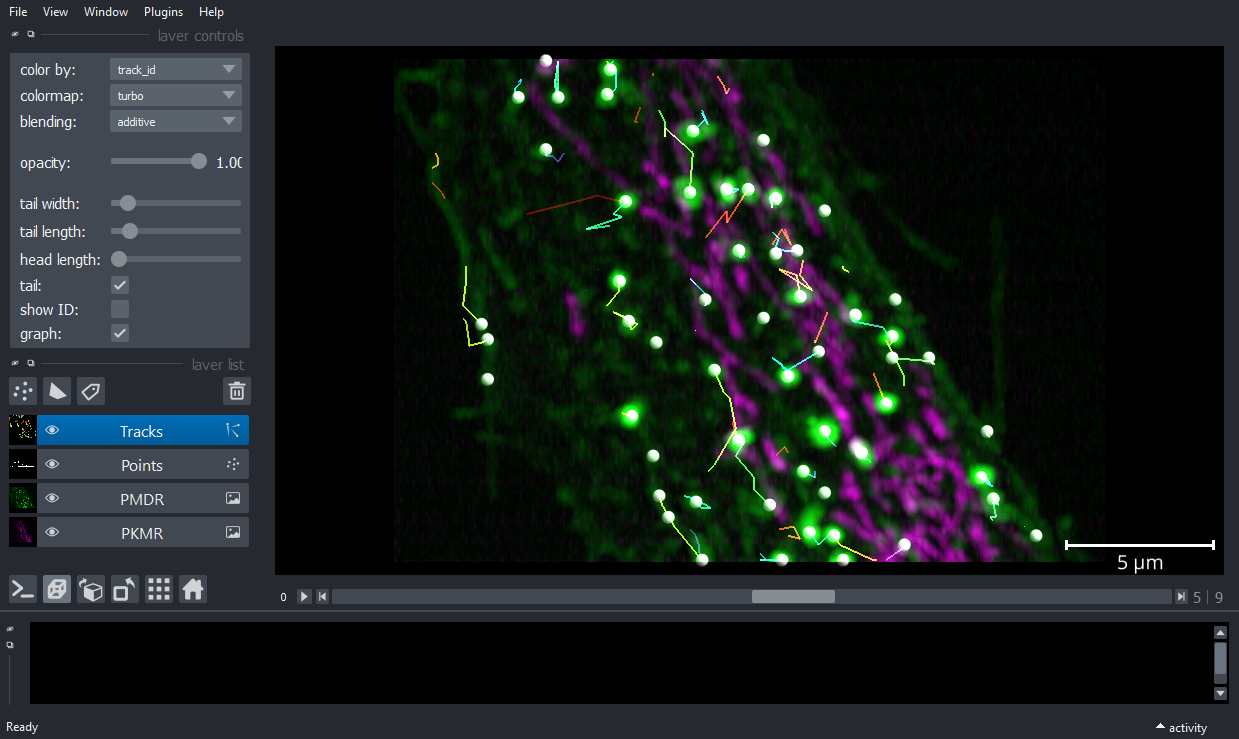

In [10]:
viewer.add_tracks(tracks.data, name='Tracks',scale=[4.3,0.316,0.104,0.104])
nbscreenshot(viewer)

## Features - tracking

In [11]:
from stracking.features import (LengthFeature, DistanceFeature,
                                DisplacementFeature)

tracks.scale=[1,0.316,0.104,0.104];

# Length feature
feature_calc = LengthFeature()
tracks = feature_calc.run(tracks)

# Distance feature
feature_calc = DistanceFeature()
tracks = feature_calc.run(tracks)

# Displacement feature
feature_calc = DisplacementFeature()
tracks = feature_calc.run(tracks)



### Display tracks properties

In [12]:
displacement=tracks.features['displacement'];
distance=tracks.features['distance'];
length=tracks.features['length'];

displacementMat = np.array([displacement[i] for i in range(len(displacement))])
distanceMat = np.array([distance[i] for i in range(len(distance))])
lengthMat = np.array([length[i] for i in range(len(length))])
speed=distanceMat/(4.3*lengthMat)

fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=False)

axs[0].hist(4.3*lengthMat, bins=8, edgecolor="white")
axs[0].set_xlabel("Track Duration [s]",fontsize=14)
axs[0].set_ylabel("Frequency",fontsize=14)
axs[0].tick_params(axis='both', labelsize=14)

axs[1].boxplot([speed],patch_artist=True,
               medianprops={"color": "red", "linewidth": 1.5},
               boxprops={"facecolor": "white", "edgecolor": "black",
                          "linewidth": 1.5},
                whiskerprops={"color": "black", "linewidth": 1.5},
                capprops={"color": "black", "linewidth": 1.5},labels=[''])
axs[1].set_ylabel("Speed [um/s]",fontsize=14)
axs[1].set_xlabel("PMDR",fontsize=14)
axs[1].tick_params(axis='both', labelsize=14)


axs[2].hist(displacementMat/distanceMat, bins=10, edgecolor="white",facecolor='gray',alpha=0.9)
axs[2].set_xlabel("Persistance [a. u.]",fontsize=14)
axs[2].set_ylabel("Frequency",fontsize=14)
axs[2].tick_params(axis='both', labelsize=14)


            

## Features tracking

In [13]:
from stracking.filters import FeatureFilter
    
f_filter = FeatureFilter(feature_name='length', min_val=10, max_val=100)
filtered_tracks = f_filter.run(tracks)

viewer.add_tracks(filtered_tracks.data,features=filtered_tracks.features,name='Filtered Tracks',scale=[4.3,0.316,0.104,0.104])
viewer.layers['Tracks'].visible=False
nbscreenshot(viewer)
